<div style="
    text-align: left;
    font-family: 'Arial', sans-serif;
    font-size: 2em;
    font-weight: bold;
    color: #051C24;
    border-left: 5px solid #007198;
    padding-left: 10px;
    margin-bottom: 15px;
    text-transform: uppercase;
">
    Devoir maison noté


</div>

**ATALLAH Joanne & COUSTILLAC Cêlestine**

<br>


## **Introduction**

INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION INTRODUCTION

<br>
<br>

## **I - Préparation des données**

### I.I - Importation des données

In [2]:
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
# Load the dataset
file_path = "gono.csv"  # Update the path if necessary
data = pd.read_csv(file_path, delimiter=',')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          3144 non-null   int64  
 1   SEXE        3144 non-null   int64  
 2   ETAT_C      3144 non-null   int64  
 3   AGE         3144 non-null   int64  
 4   ORIENT_SEX  3144 non-null   int64  
 5   MTS_ANT     3144 non-null   int64  
 6   NB_MTS      3144 non-null   int64  
 7   RAISON      3144 non-null   int64  
 8   NB_PART     3143 non-null   float64
 9   HISTOIRE    3143 non-null   float64
 10  CULTURE     3143 non-null   float64
 11  DIAGN       3143 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 294.9 KB


,ID,SEXE,ETAT_C,AGE,ORIENT_SEX,MTS_ANT,NB_MTS,RAISON,NB_PART,HISTOIRE,CULTURE,DIAGN
0,1002,1,1,29,1,2,8,3,5.0,0.0,0.0,0.0
1,1010,1,1,18,1,1,0,2,1.0,1.0,1.0,1.0
2,1011,1,1,24,1,2,1,1,2.0,0.0,0.0,0.0
3,1012,1,1,29,1,2,3,1,6.0,0.0,1.0,1.0
4,1013,1,3,28,1,2,3,1,2.0,0.0,0.0,0.0


<br>

### I.III - Nettoyage des données

#### a) Valeurs manquantes

In [6]:
df_new = data.copy()

df_new.replace("", np.nan, inplace=True) # Remplacer les blancs en NaN

# Remplacer les valeurs 9 par NaN dans les colonnes des variables 3, 5, 6, 8, 10, 11, 12
cols_9 = ['ETAT_C', 'ORIENT_SEX', 'MTS_ANT', 'RAISON', 'HISTOIRE', 'CULTURE', 'DIAGN']  # Correspond aux variables 3, 5, 6, 8, 10, 11, 12
df_new[cols_9] = df_new[cols_9].replace(9, pd.NA)

# Remplacer les valeurs 99 par NaN dans les colonnes des variables 4, 9
cols_99 = ['AGE', 'NB_PART']  # Correspond aux variables 4, 9
df_new[cols_99] = df_new[cols_99].replace(99, pd.NA)

print(df_new.isna().sum())

ID              0
SEXE            0
ETAT_C          4
AGE             6
ORIENT_SEX    257
MTS_ANT         0
NB_MTS          0
RAISON          2
NB_PART        66
HISTOIRE      107
CULTURE        73
DIAGN          73
dtype: int64


In [7]:
df_new2 = df_new.dropna(thresh=df_new.shape[1] - 2) # Supprimer les lignes avec au moins 2 NaN
df_new2 = df_new2[df_new2['DIAGN'].notna()] # Supprimer les lignes où DIAGN est NaN
print(df_new2.isna().sum())

ID              0
SEXE            0
ETAT_C          4
AGE             6
ORIENT_SEX    246
MTS_ANT         0
NB_MTS          0
RAISON          2
NB_PART        65
HISTOIRE      102
CULTURE         0
DIAGN           0
dtype: int64


In [8]:
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

df_new3 = df_new2.copy()

df_new3['SEXE'] = df_new3['SEXE'].fillna(df_new3['SEXE'].median())
df_new3['ETAT_C'] = df_new3['ETAT_C'].fillna(df_new3['ETAT_C'].median())
df_new3['AGE'] = df_new3['AGE'].fillna(df_new3['AGE'].median())
df_new3['ORIENT_SEX'] = df_new3['ORIENT_SEX'].fillna(df_new3['ORIENT_SEX'].median())
df_new3['MTS_ANT'] = df_new3['MTS_ANT'].fillna(df_new3['MTS_ANT'].median())
df_new3['NB_MTS'] = df_new3['NB_MTS'].fillna(df_new3['NB_MTS'].median())
df_new3['RAISON'] = df_new3['RAISON'].fillna(df_new3['RAISON'].median())
df_new3['NB_PART'] = df_new3['NB_PART'].fillna(df_new3['NB_PART'].median())
df_new3['HISTOIRE'] = df_new3['HISTOIRE'].fillna(df_new3['HISTOIRE'].median())
df_new3['CULTURE'] = df_new3['CULTURE'].fillna(df_new3['CULTURE'].median())

# summarize the shape of the data with missing rows remove
print(df_new3.shape)
print(df_new3.isna().sum())
df_new3.info()

(3071, 12)
ID            0
SEXE          0
ETAT_C        0
AGE           0
ORIENT_SEX    0
MTS_ANT       0
NB_MTS        0
RAISON        0
NB_PART       0
HISTOIRE      0
CULTURE       0
DIAGN         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 3071 entries, 0 to 3142
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          3071 non-null   int64 
 1   SEXE        3071 non-null   int64 
 2   ETAT_C      3071 non-null   object
 3   AGE         3071 non-null   object
 4   ORIENT_SEX  3071 non-null   object
 5   MTS_ANT     3071 non-null   int64 
 6   NB_MTS      3071 non-null   int64 
 7   RAISON      3071 non-null   object
 8   NB_PART     3071 non-null   object
 9   HISTOIRE    3071 non-null   object
 10  CULTURE     3071 non-null   object
 11  DIAGN       3071 non-null   object
dtypes: int64(4), object(8)
memory usage: 311.9+ KB


In [9]:
# Conversion en int64 après suppression des NaN
# Convertir toutes les colonnes object en int64
for col in df_new3.select_dtypes(include='object').columns:
    df_new3[col] = df_new3[col].astype('int64')

df_new3.info()
df_new3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3071 entries, 0 to 3142
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          3071 non-null   int64
 1   SEXE        3071 non-null   int64
 2   ETAT_C      3071 non-null   int64
 3   AGE         3071 non-null   int64
 4   ORIENT_SEX  3071 non-null   int64
 5   MTS_ANT     3071 non-null   int64
 6   NB_MTS      3071 non-null   int64
 7   RAISON      3071 non-null   int64
 8   NB_PART     3071 non-null   int64
 9   HISTOIRE    3071 non-null   int64
 10  CULTURE     3071 non-null   int64
 11  DIAGN       3071 non-null   int64
dtypes: int64(12)
memory usage: 311.9 KB


,ID,SEXE,ETAT_C,AGE,ORIENT_SEX,MTS_ANT,NB_MTS,RAISON,NB_PART,HISTOIRE,CULTURE,DIAGN
0,1002,1,1,29,1,2,8,3,5,0,0,0
1,1010,1,1,18,1,1,0,2,1,1,1,1
2,1011,1,1,24,1,2,1,1,2,0,0,0
3,1012,1,1,29,1,2,3,1,6,0,1,1
4,1013,1,3,28,1,2,3,1,2,0,0,0


<br>

#### b) Valeurs abérantes ?

In [11]:
# Liste des variables numériques continues
vars_cont = ['AGE', 'NB_PART', 'NB_MTS']

df_new3[vars_cont].describe().round(2)

,AGE,NB_PART,NB_MTS
count,3071.00,3071.00,3071.00
mean,28.44,3.17,1.21
std,7.80,6.08,2.57
min,14.00,0.00,0.00
25%,23.00,1.00,0.00
50%,27.00,2.00,1.00
75%,32.00,3.00,1.00
max,78.00,98.00,65.00


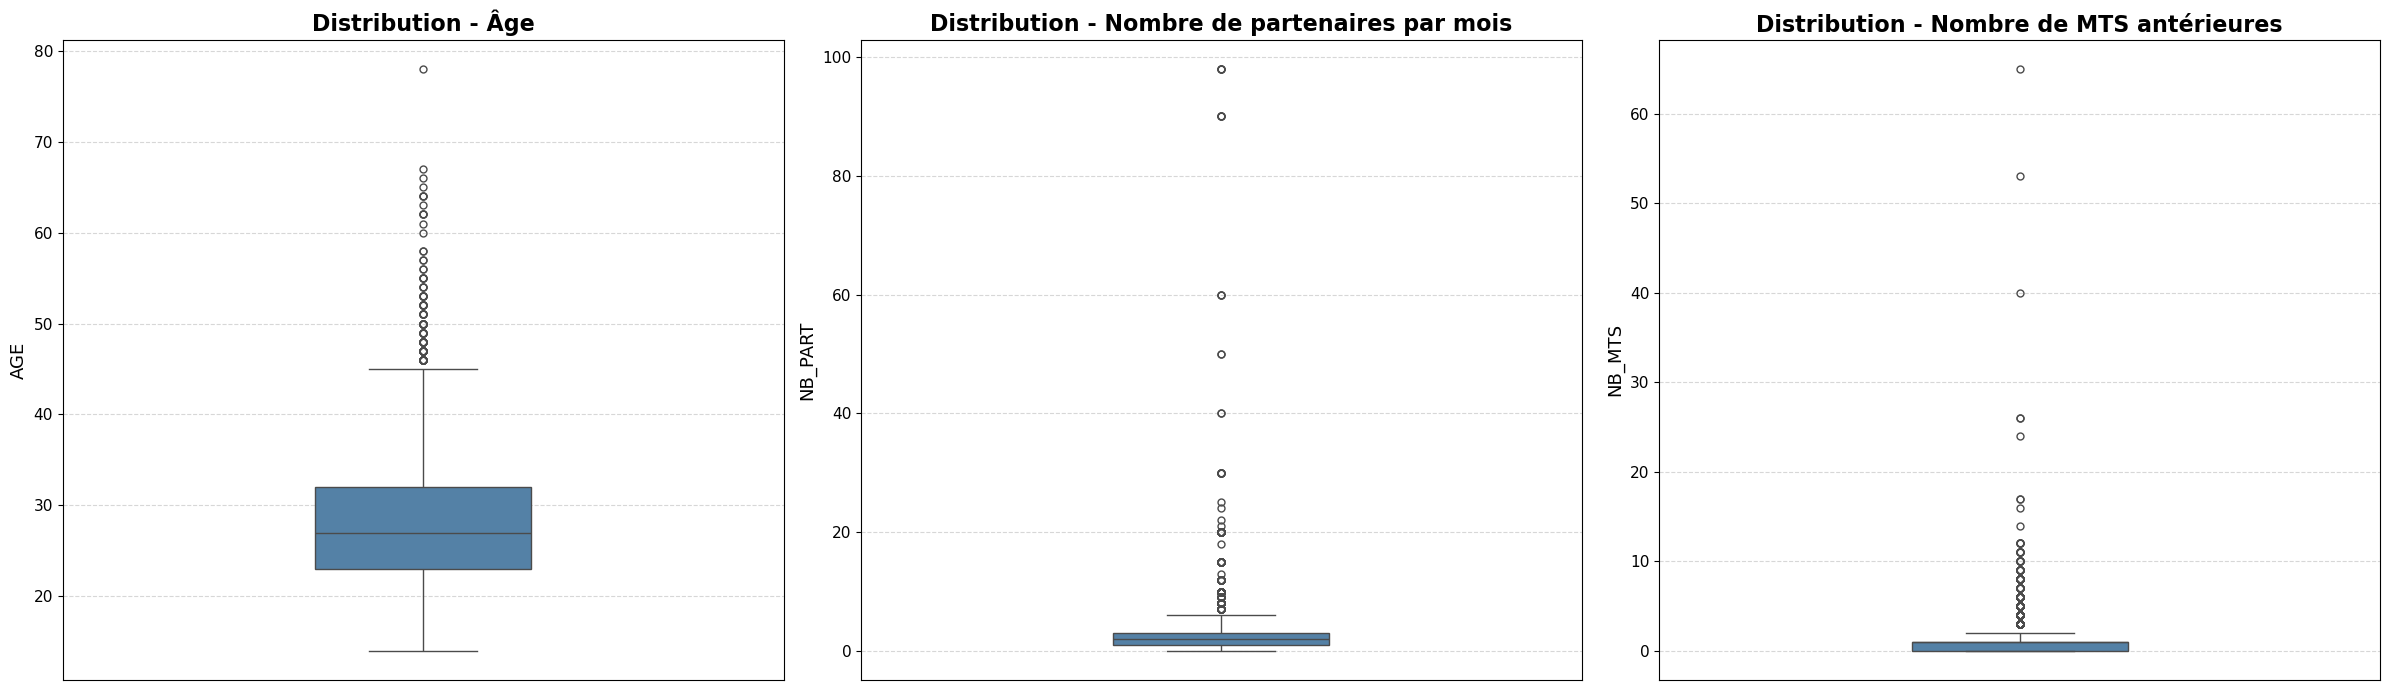

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables continues et titres associés
vars_cont = ['AGE', 'NB_PART', 'NB_MTS']
titles = ['Âge', 'Nombre de partenaires par mois', 'Nombre de MTS antérieures']

# Création de la figure avec 3 sous-graphes côte à côte
plt.figure(figsize=(24, 7))

for i, var in enumerate(vars_cont):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df_new3[var], color="steelblue", fliersize=5, width=0.3)
    plt.title(f'Distribution - {titles[i]}', fontsize=16, fontweight='bold')
    plt.ylabel(var, fontsize=13)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks([])  # on retire l'axe X car inutile ici
    plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()

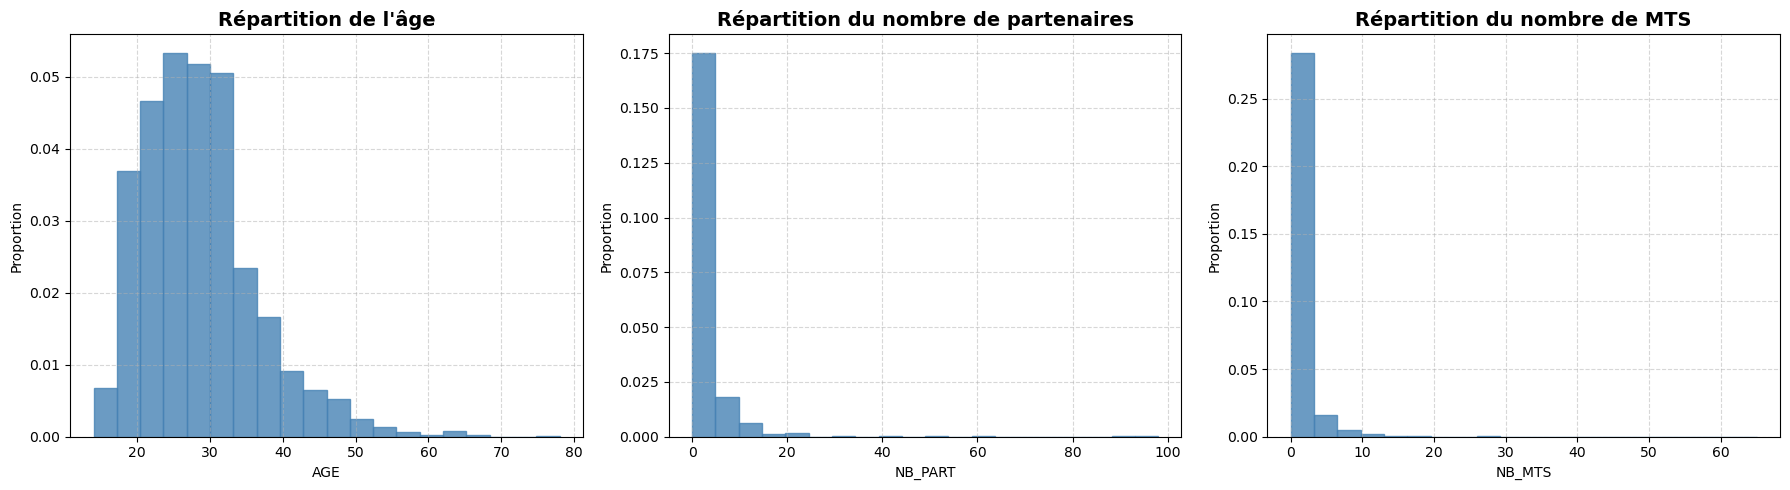

In [13]:
import matplotlib.pyplot as plt

vars_cont = ['AGE', 'NB_PART', 'NB_MTS']
titles = ['Répartition de l\'âge', 'Répartition du nombre de partenaires', 'Répartition du nombre de MTS']

plt.figure(figsize=(18, 5))  # Largeur ajustée pour 3 histogrammes côte à côte

for i, var in enumerate(vars_cont):
    plt.subplot(1, 3, i + 1)  # 1 ligne, 3 colonnes
    plt.hist(df_new3[var], bins=20, edgecolor='steelblue', color='steelblue', alpha=0.8, density=True)
    plt.title(titles[i], fontsize=14, fontweight='bold')
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# valeur abérantes pour le nombre de partenaire car 80 partenaires dans le mois ?????????????

<br>

#### c) transformations variables 

In [15]:
df = df_new3.copy()

df['AGE'] = (df['AGE'] >= 30).astype(int) # l'âge considéré comme une variable dichotomique séparant les moins de 30 ans des 30 ans et plus

# df['MTS_ANT'] = (df['NB_MTS'] >= 1).astype(int) # le nombre de MTS antérieures considéré comme une variable dichotomique séparant ceux ayant déjà eu ou non 
# pas compris pq le prof demande ça si existe déjà ?? 
df.drop(columns='NB_MTS', inplace=True) # Supprimer l'ancienne colonne NB_PART car plus utile

position = df.columns.get_loc('NB_PART') + 1
df.insert(position, 'PART', (df['NB_PART'] >= 3).astype(int)) # nombre de partenaires considéré comme une variable dichotomique séparant les peu actifs des très actifs
df.drop(columns='NB_PART', inplace=True) # Supprimer l'ancienne colonne NB_PART car plus utile
df = df.drop(['ID'], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3071 entries, 0 to 3142
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   SEXE        3071 non-null   int64
 1   ETAT_C      3071 non-null   int64
 2   AGE         3071 non-null   int32
 3   ORIENT_SEX  3071 non-null   int64
 4   MTS_ANT     3071 non-null   int64
 5   RAISON      3071 non-null   int64
 6   PART        3071 non-null   int32
 7   HISTOIRE    3071 non-null   int64
 8   CULTURE     3071 non-null   int64
 9   DIAGN       3071 non-null   int64
dtypes: int32(2), int64(8)
memory usage: 239.9 KB


,SEXE,ETAT_C,AGE,ORIENT_SEX,MTS_ANT,RAISON,PART,HISTOIRE,CULTURE,DIAGN
0,1,1,0,1,2,3,1,0,0,0
1,1,1,0,1,1,2,0,1,1,1
2,1,1,0,1,2,1,0,0,0,0
3,1,1,0,1,2,1,1,0,1,1
4,1,3,0,1,2,1,0,0,0,0


<br>

#### d) données déséquilibrées ? 

In [17]:
df.DIAGN.value_counts()

DIAGN
0    2305
1     766
Name: count, dtype: int64

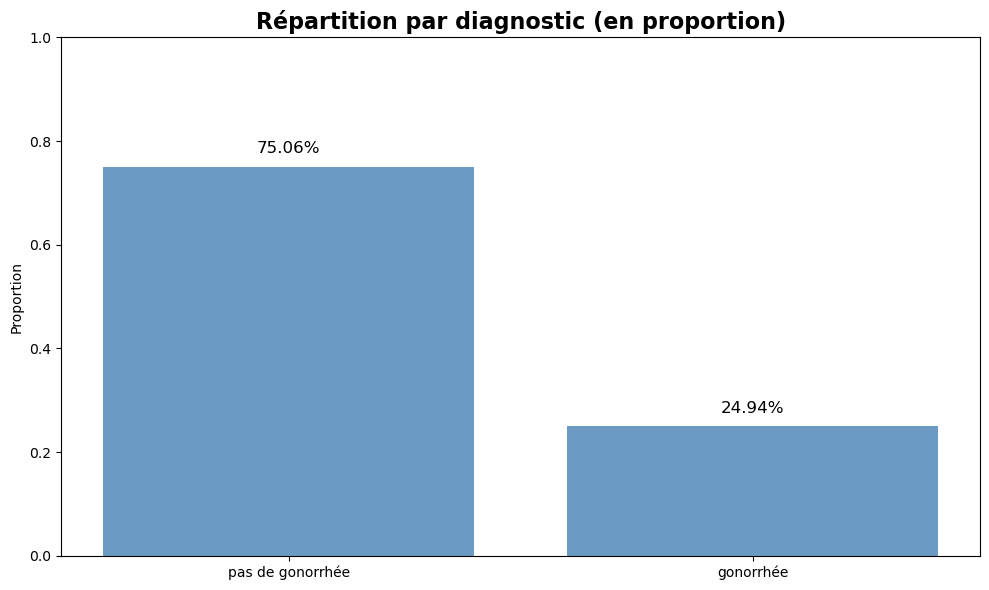

In [18]:
# Calcul des proportions
proportions = df['DIAGN'].value_counts(normalize=True).sort_index()

# Étiquettes
labels = ['pas de gonorrhée', 'gonorrhée']

# Affichage du graphique
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, proportions, color='steelblue', alpha=0.8)
plt.title("Répartition par diagnostic (en proportion)", fontsize=16, fontweight='bold')
plt.ylabel("Proportion")
plt.ylim(0, 1)

# Ajout des pourcentages au-dessus des barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2%}", 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

La répartition des diagnostics montre que **les données ne semblent pas fortement déséquilibrées**, avec environ 25% des observations correspondant à un cas de gonorrhée (766 sur 3 071 au total).


<br>
<br>

## **2. Analyse descriptive des données**

In [29]:
#test independance dooublon les ind qui ont au moins deux na

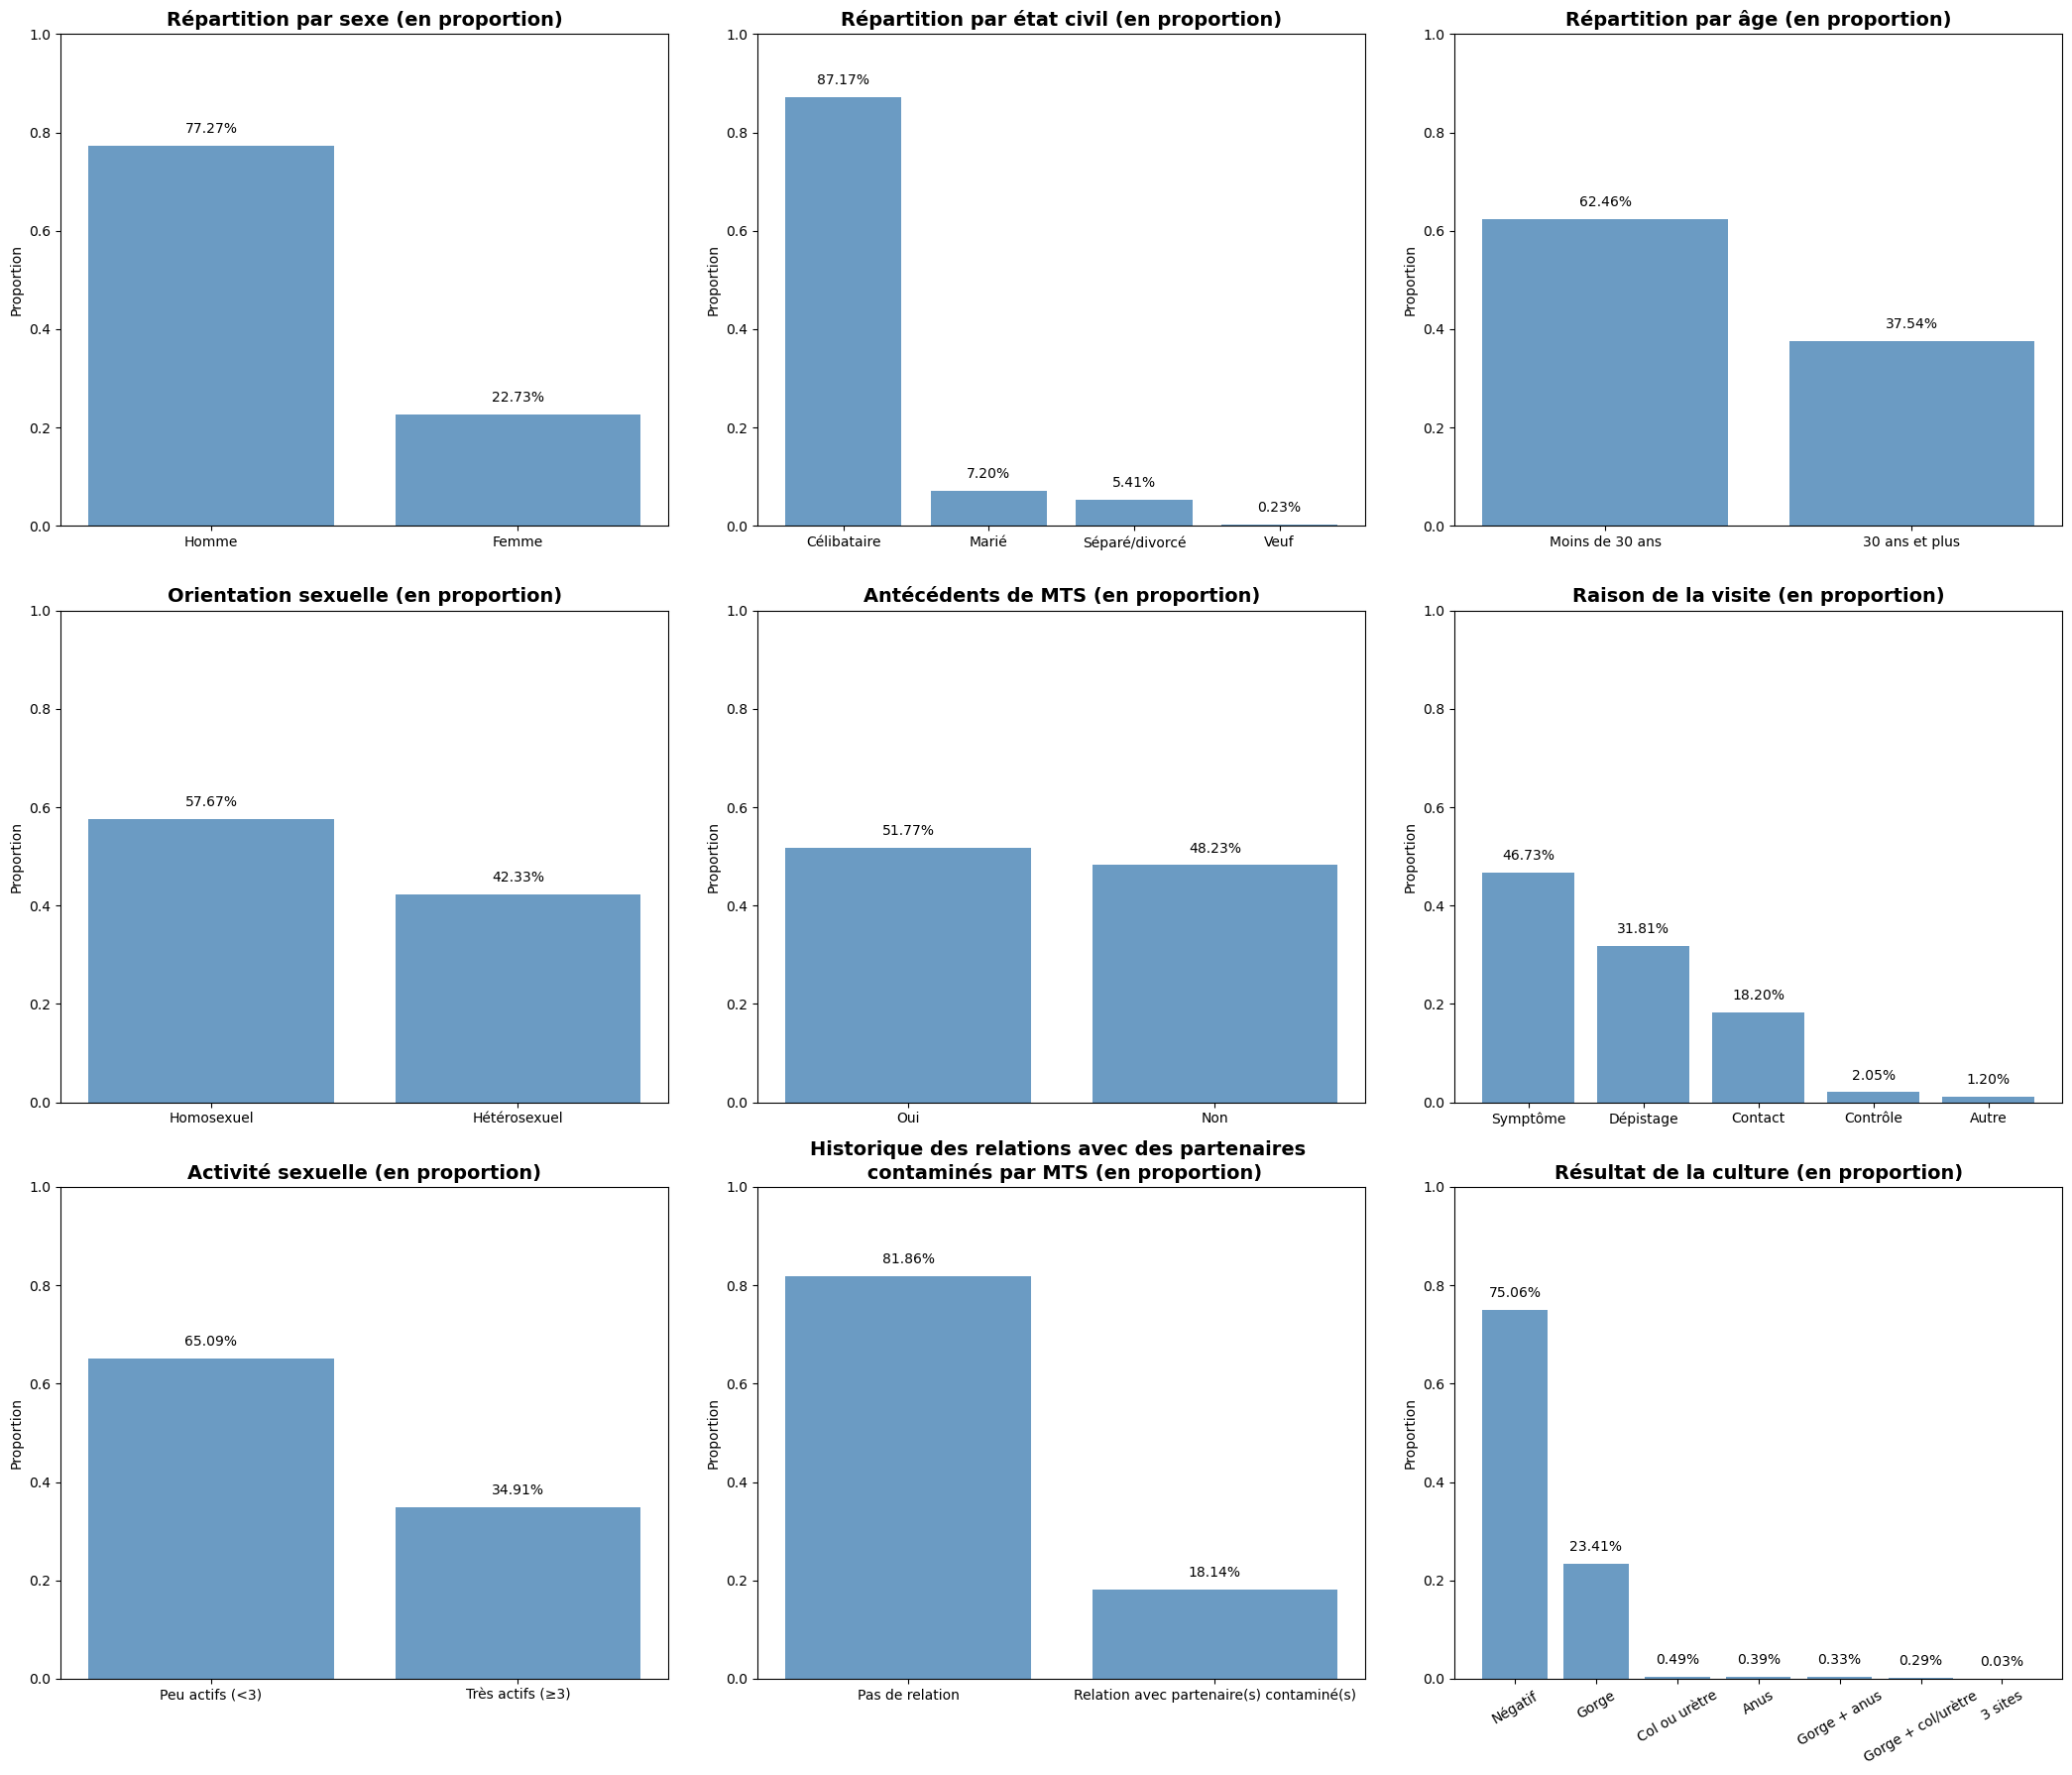

In [30]:
import matplotlib.pyplot as plt

plots = []

# 1. Sexe
sexe_prop = df['SEXE'].value_counts(normalize=True).sort_values(ascending=False)
sexe_labels = {1: 'Homme', 2: 'Femme'}
plots.append(([sexe_labels[i] for i in sexe_prop.index], sexe_prop.values, "Répartition par sexe"))

# 2. État civil
etat_prop = df['ETAT_C'].value_counts(normalize=True).sort_values(ascending=False)
etat_labels = {1: "Célibataire", 2: "Marié", 3: "Séparé/divorcé", 4: "Veuf", 5: "Pas de réponse"}
plots.append(([etat_labels[i] for i in etat_prop.index], etat_prop.values, "Répartition par état civil"))

# 3. Âge
age_prop = df['AGE'].value_counts(normalize=True).sort_values(ascending=False)
age_labels = {1: '30 ans et plus', 0: 'Moins de 30 ans'}
plots.append(([age_labels[i] for i in age_prop.index], age_prop.values, "Répartition par âge"))

# 4. Orientation sexuelle 
orient_prop = df['ORIENT_SEX'].value_counts(normalize=True).sort_values(ascending=False)
orient_labels = {1: 'Homosexuel', 2: 'Hétérosexuel'}
plots.append(([orient_labels[i] for i in orient_prop.index], orient_prop.values, "Orientation sexuelle"))

# 5. Antécédents MTS
mts_prop = df['MTS_ANT'].value_counts(normalize=True).sort_values(ascending=False)
mts_labels = {1: "Non", 2: "Oui"}
plots.append(([mts_labels[i] for i in mts_prop.index], mts_prop.values, "Antécédents de MTS"))

# 6. Raison de la visite
raison_prop = df['RAISON'].value_counts(normalize=True).sort_values(ascending=False)
raison_labels = {1: "Symptôme", 2: "Contact", 3: "Dépistage", 4: "Contrôle", 5: "Autre"}
plots.append(([raison_labels[i] for i in raison_prop.index], raison_prop.values, "Raison de la visite"))

# 7. Activité sexuelle 
part_prop = df['PART'].value_counts(normalize=True).sort_values(ascending=False)
part_labels = {1: 'Très actifs (≥3)', 0: 'Peu actifs (<3)'}
plots.append(([part_labels[i] for i in part_prop.index], part_prop.values, "Activité sexuelle"))

# 8. Histoire
histoire_prop = df['HISTOIRE'].value_counts(normalize=True).sort_values(ascending=False)
histoire_labels = {0: "Pas de relation", 1: "Relation avec partenaire(s) contaminé(s)"}
plots.append(([histoire_labels[i] for i in histoire_prop.index], histoire_prop.values, "Historique des relations avec des partenaires \n contaminés par MTS"))

# 9. Résultat de la culture
culture_prop = df['CULTURE'].value_counts(normalize=True).sort_values(ascending=False)
culture_labels = {0: "Négatif",1: "Gorge",2: "Col ou urètre",3: "Anus",4: "Gorge + col/urètre",5: "Gorge + anus",6: "Col/urètre + anus",7: "3 sites"}
plots.append(([culture_labels[i] for i in culture_prop.index], culture_prop.values, "Résultat de la culture"))



# Création des graphiques
n_plots = len(plots)
cols = 3
rows = (n_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(21, 6 * rows))
axes = axes.flatten()

for i, (labels, values, title) in enumerate(plots):
    bars = axes[i].bar(labels, values, color='steelblue', alpha=0.8)
    axes[i].set_title(title + " (en proportion)", fontsize=14, fontweight='bold')
    axes[i].set_ylim(0, 1)
    axes[i].set_ylabel("Proportion")

    # Rotation des labels uniquement si plus de 5 modalités
    if len(labels) > 5:
        axes[i].tick_params(axis='x', rotation=30)

    # Affichage des pourcentages
    for j, value in enumerate(values):
        axes[i].text(j, value + 0.02, f"{value:.2%}", ha='center', va='bottom', fontsize=10)

# Suppression des axes vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import numpy as np

In [238]:
# Définir les variables indépendantes (features) et la variable dépendante (target)
X = df.drop(['DIAGN','CULTURE'], axis=1)
y = df['DIAGN']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Utiliser GridSearchCV pour trouver les meilleurs paramètres en utilisant la métrique de rappel (Recall)
param_grid = {'penalty': ['l2', 'l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_clf = LogisticRegression(random_state=42, solver='liblinear')
CV_log_clf = GridSearchCV(estimator=log_clf, param_grid=param_grid, scoring='recall', verbose=1, n_jobs=-1)
CV_log_clf.fit(X_train, y_train)

# Meilleurs paramètres trouvés
best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

# Créer le modèle de régression logistique avec les meilleurs paramètres
CV_log_clf_2 = LogisticRegression(C=best_parameters['C'], penalty=best_parameters['penalty'], random_state=42, solver='liblinear')

# Appliquer RFE pour sélectionner les meilleures variables
selector = RFE(CV_log_clf_2)
selector = selector.fit(X_train, y_train)

# Afficher le nombre optimal de caractéristiques sélectionnées
print('Optimal number of features: {}'.format(selector.n_features_))

# Obtenir les indices des colonnes non sélectionnées
cols_of_interest = list(np.where(selector.support_ == False)[0])
print('Colonnes non sélectionnées :', cols_of_interest)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 0.001, 'penalty': 'l2'}
Optimal number of features: 4
Colonnes non sélectionnées : [2, 5, 6, 7]


In [239]:
X_train

,SEXE,ETAT_C,AGE,ORIENT_SEX,MTS_ANT,RAISON,PART,HISTOIRE
2631,1,2,1,1,2,3,0,0
812,1,1,0,2,1,3,0,0
2247,1,1,1,1,2,3,1,0
561,1,1,0,2,1,3,0,0
2099,1,1,0,1,2,3,1,0
...,...,...,...,...,...,...,...,...
1640,1,1,1,2,2,1,0,0
1096,1,1,0,2,1,3,0,0
1131,2,1,0,2,1,3,0,0
1295,1,2,1,2,1,2,0,1


In [240]:
# Obtenir les indices des colonnes sélectionnées et leurs noms
selected_columns = X_train.columns[selector.support_].tolist()

# Afficher les colonnes sélectionnées
print('Colonnes sélectionnées :', selected_columns)


Colonnes sélectionnées : ['SEXE', 'ETAT_C', 'ORIENT_SEX', 'MTS_ANT']


In [241]:
# Transformer la colonne 'ETAT_C' en une colonne binaire 'ETAT_C_BIN'
df['MARIE'] = df['ETAT_C'].apply(lambda x: 1 if x == 1 else 0)
# df['SEXE'] = df['SEXE'].apply(lambda x: 1 if x == 2 else 0)
# df['ORIENT_SEX'] = df['ORIENT_SEX'].apply(lambda x: 1 if x == 2 else 0)

# Afficher un aperçu du DataFrame pour vérifier la transformation
print(df[['ETAT_C', 'MARIE']].head(10))

   ETAT_C  MARIE
0       1      1
1       1      1
2       1      1
3       1      1
4       3      0
5       1      1
6       1      1
7       1      1
8       1      1
9       1      1


In [242]:
df

,SEXE,ETAT_C,AGE,ORIENT_SEX,MTS_ANT,RAISON,PART,HISTOIRE,CULTURE,DIAGN,MARIE
0,1,1,0,1,2,3,1,0,0,0,1
1,1,1,0,1,1,2,0,1,1,1,1
2,1,1,0,1,2,1,0,0,0,0,1
3,1,1,0,1,2,1,1,0,1,1,1
4,1,3,0,1,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3138,1,1,0,2,1,1,0,0,0,0,1
3139,1,3,0,2,1,2,1,1,0,0,0
3140,2,1,0,2,1,2,1,1,0,0,1
3141,1,3,1,1,2,1,0,0,0,0,0


In [243]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd



# Créer X et y
X = df.drop(['DIAGN','CULTURE','ETAT_C'], axis=1)
y = df['DIAGN']

# Assure-toi que toutes les variables explicatives sont numériques (entiers positifs)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Initialiser le test du Chi²
chi2_selector = SelectKBest(score_func=chi2, k='all')

# Appliquer le test du Chi²
chi2_selector.fit(X, y)

# Récupérer les scores de Chi² pour chaque variable
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

# Afficher les résultats
resultats_chi2 = pd.DataFrame({
    'Variable': X.columns,
    'Chi² Score': chi2_scores,
    'p-value': chi2_pvalues
}).sort_values(by='p-value')

print(resultats_chi2)


     Variable  Chi² Score       p-value
5        PART   53.490399  2.598597e-13
2  ORIENT_SEX   17.090273  3.564440e-05
0        SEXE    8.644917  3.279750e-03
1         AGE    5.868931  1.541041e-02
7       MARIE    2.344114  1.257571e-01
3     MTS_ANT    0.388242  5.332250e-01
6    HISTOIRE    0.353029  5.524033e-01
4      RAISON    0.111633  7.382928e-01


In [244]:
X

,SEXE,AGE,ORIENT_SEX,MTS_ANT,RAISON,PART,HISTOIRE,MARIE
0,1,0,1,2,3,1,0,1
1,1,0,1,1,2,0,1,1
2,1,0,1,2,1,0,0,1
3,1,0,1,2,1,1,0,1
4,1,0,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...
3138,1,0,2,1,1,0,0,1
3139,1,0,2,1,2,1,1,0
3140,2,0,2,1,2,1,1,1
3141,1,1,1,2,1,0,0,0


In [247]:
X = df.drop(['DIAGN','CULTURE','ETAT_C'], axis=1)
y = df['DIAGN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
import warnings
warnings.filterwarnings('ignore')


In [248]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.533846
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  DIAGN   No. Observations:                 3071
Model:                          Logit   Df Residuals:                     3063
Method:                           MLE   Df Model:                            7
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:                 0.04960
Time:                        02:45:28   Log-Likelihood:                -1639.4
converged:                       True   LL-Null:                       -1725.0
Covariance Type:            nonrobust   LLR p-value:                 1.450e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SEXE          -0.4286      0.132     -3.241      0.001      -0.688      -0.169
AGE           -0.3444      0.

In [249]:
import statsmodels.api as sm


def processSubset(feature_set):
    
    try:
        # Ajouter une constante aux données d'entraînement
        X_subset = sm.add_constant(X[list(feature_set)], has_constant='add')  
        
        # Entraîner un modèle de régression logistique
        model = sm.Logit(y, X_subset)
        regr = model.fit(disp=0)  # disp=0 pour éviter les messages d'avertissement
        
        # Calcul de la log-vraisemblance (remplace RSS)
        LL = regr.llf  # Log-Likelihood
        
        return {"model": regr, "Log-Likelihood": LL}
    except (np.linalg.LinAlgError, ValueError):
        # En cas d'erreur de matrice singulière ou d'autre erreur
        return {"model": None, "Log-Likelihood": -np.inf}

def getBest(k):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        result = processSubset(combo)
        
        # Ajouter uniquement les résultats valides
        if result["model"] is not None:
            results.append(result)
    
    # Convertir les résultats en DataFrame
    if len(results) > 0:
        models = pd.DataFrame(results)
        
        if 'Log-Likelihood' in models.columns:
            best_model = models.loc[models['Log-Likelihood'].idxmax()]
        else:
            raise ValueError("La colonne 'Log-Likelihood' n'a pas été générée correctement.")
    else:
        raise ValueError("Aucun modèle valide n'a été généré.")
    
    toc = time.time()
    print(f"Processed {len(results)} models on {k} predictors in {(toc-tic):.2f} seconds.")
    
    return best_model


# This returns a `DataFrame` containing the best model that we generated, 
# along with some extra information about the model. Now we want to call that 
# function for each number of predictors $k$:


models_best = pd.DataFrame(columns=["Log-Likelihood", "model"])

tic = time.time()
for i in range(1, min(10, len(X_train.columns) + 1)):  # Limiter à 10 ou moins de variables
    best_model = getBest(i)
    models_best.loc[i] = [best_model["Log-Likelihood"], best_model["model"]]

toc = time.time()
print("Total elapsed time:", (toc - tic), "seconds.")

# Afficher les résultats
print(models_best)


Processed 8 models on 1 predictors in 0.02 seconds.
Processed 28 models on 2 predictors in 0.06 seconds.
Processed 56 models on 3 predictors in 0.17 seconds.
Processed 70 models on 4 predictors in 0.38 seconds.
Processed 56 models on 5 predictors in 0.39 seconds.
Processed 28 models on 6 predictors in 0.50 seconds.
Processed 8 models on 7 predictors in 0.08 seconds.
Processed 1 models on 8 predictors in 0.01 seconds.
Total elapsed time: 1.6163151264190674 seconds.
   Log-Likelihood                                              model
1    -1673.304659  <statsmodels.discrete.discrete_model.BinaryRes...
2    -1655.519195  <statsmodels.discrete.discrete_model.BinaryRes...
3    -1647.225163  <statsmodels.discrete.discrete_model.BinaryRes...
4    -1642.467383  <statsmodels.discrete.discrete_model.BinaryRes...
5    -1639.595859  <statsmodels.discrete.discrete_model.BinaryRes...
6    -1639.388065  <statsmodels.discrete.discrete_model.BinaryRes...
7    -1639.323587  <statsmodels.discrete.discret

In [250]:
import statsmodels.api as sm
import itertools
import pandas as pd
import numpy as np
import time

# Stockage des résultats
selected_vars = {}

def processSubset(feature_set):
    try:
        X_subset = X[list(feature_set)]
        model = sm.Logit(y, X_subset)
        regr = model.fit(disp=0)
        LL = regr.llf
        return {"variables": feature_set, "Log-Likelihood": LL, "model": regr}
    except (np.linalg.LinAlgError, ValueError):
        return {"variables": None, "Log-Likelihood": -np.inf, "model": None}

def getBest(k):
    best_result = {"variables": None, "Log-Likelihood": -np.inf, "model": None}
    for combo in itertools.combinations(X.columns, k):
        result = processSubset(combo)
        if result["Log-Likelihood"] > best_result["Log-Likelihood"]:
            best_result = result
    return best_result

# Boucle pour k de 1 à n variables
for k in range(1, min(10, len(X.columns)+1)):
    best = getBest(k)
    selected_vars[k] = best["variables"]
    print(f"{k} variable(s) sélectionnée(s) : {best['variables']}")

# Exemple d’application du seuil sur le meilleur modèle trouvé (k=best_k)
# Remplace best_k par la valeur de k choisie, ex : best_k = 4
best_k = max(selected_vars.keys())  # ou choisis un k spécifique
final_best = getBest(best_k)

# Prédiction des probabilités
X_best = X[list(final_best["variables"])]
model_final = final_best["model"]
y_pred_prob = model_final.predict(X_best)

# Application d’un seuil de 0.22 pour obtenir des prédictions binaires
threshold = 0.22
y_pred_binary = (y_pred_prob >= threshold).astype(int)

# Affichage des premières prédictions
print("\nPrédictions binaires avec seuil 0.22 :")
print(y_pred_binary.head())


1 variable(s) sélectionnée(s) : ('ORIENT_SEX',)
2 variable(s) sélectionnée(s) : ('ORIENT_SEX', 'PART')
3 variable(s) sélectionnée(s) : ('AGE', 'ORIENT_SEX', 'PART')
4 variable(s) sélectionnée(s) : ('SEXE', 'AGE', 'ORIENT_SEX', 'PART')
5 variable(s) sélectionnée(s) : ('SEXE', 'AGE', 'ORIENT_SEX', 'PART', 'HISTOIRE')
6 variable(s) sélectionnée(s) : ('SEXE', 'AGE', 'ORIENT_SEX', 'PART', 'HISTOIRE', 'MARIE')
7 variable(s) sélectionnée(s) : ('SEXE', 'AGE', 'ORIENT_SEX', 'MTS_ANT', 'PART', 'HISTOIRE', 'MARIE')
8 variable(s) sélectionnée(s) : ('SEXE', 'AGE', 'ORIENT_SEX', 'MTS_ANT', 'RAISON', 'PART', 'HISTOIRE', 'MARIE')

Prédictions binaires avec seuil 0.22 :
0    1
1    1
2    1
3    1
4    1
dtype: int32


In [251]:
print(models_best.loc[5, "model"].summary())

                           Logit Regression Results                           
Dep. Variable:                  DIAGN   No. Observations:                 3071
Model:                          Logit   Df Residuals:                     3065
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:                 0.04951
Time:                        02:45:31   Log-Likelihood:                -1639.6
converged:                       True   LL-Null:                       -1725.0
Covariance Type:            nonrobust   LLR p-value:                 4.876e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1166      0.183      0.637      0.524      -0.242       0.475
SEXE          -0.4541      0.140     -3.249      0.001      -0.728      -0.180
AGE           -0.3748      0.091     -4.128      0.0

In [252]:
model = models_best.loc[5, "model"]  # Récupère ton modèle

# McFadden's R²
mcfadden_r2 = 1 - (model.llf / model.llnull)
print("McFadden's R²:", mcfadden_r2)


McFadden's R²: 0.049512951251565296


In [253]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
mcfadden_r2 = models_best.apply(
    lambda row: 1 - (row["model"].llf / row["model"].llnull) if row["model"] is not None else np.nan,
    axis=1
)
mcfadden_r2

1    0.029972
2    0.040282
3    0.045090
4    0.047848
5    0.049513
6    0.049633
7    0.049671
8    0.049692
dtype: float64

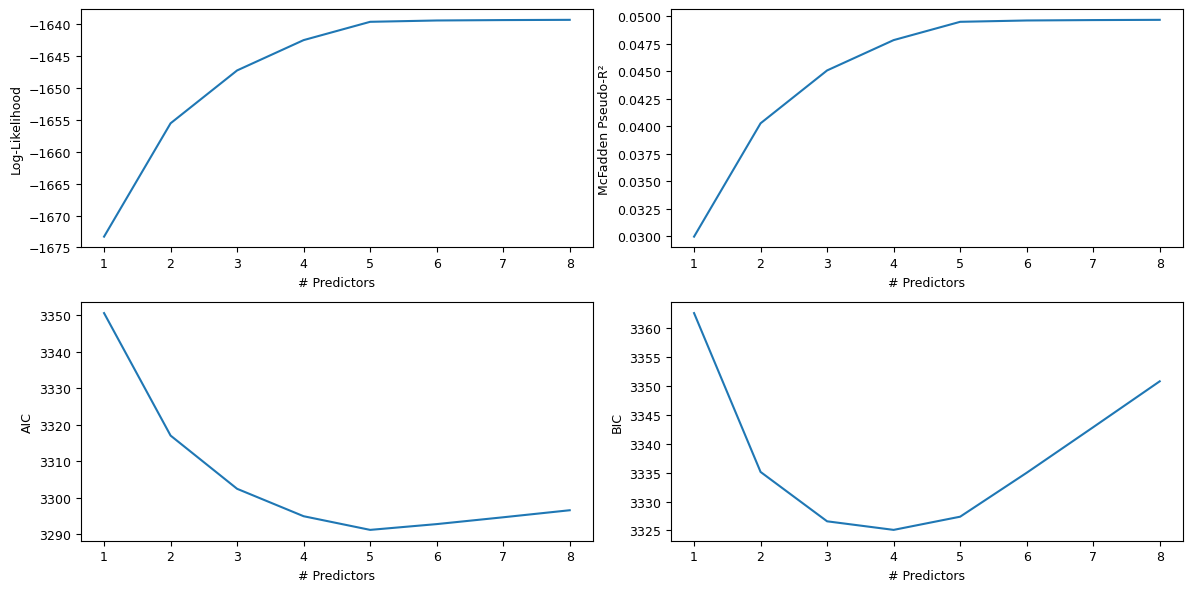

In [254]:
# As expected, the $R^2$ statistic increases monotonically as more
# variables are included.
# 
# Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will
# help us decide which model to select. Note the `type="l"` option tells `R` to
# connect the plotted points with lines:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 9, 'lines.markersize': 6})

# Set up a 2x2 grid so we can look at 4 plots at once

# 1. Log-Likelihood Plot (On veut maximiser)
plt.subplot(2, 2, 1)
log_likelihoods = models_best.apply(lambda row: row["model"].llf if row["model"] is not None else np.nan, axis=1)
plt.plot(log_likelihoods)
plt.xlabel('# Predictors')
plt.ylabel('Log-Likelihood')

# 2. McFadden's Pseudo-R² Plot (On veut maximiser)
plt.subplot(2, 2, 2)
pseudo_r2 = models_best.apply(lambda row: 1 - (row["model"].llf / row["model"].llnull) if row["model"] is not None else np.nan, axis=1)
plt.plot(pseudo_r2)
plt.xlabel('# Predictors')
plt.ylabel('McFadden Pseudo-R²')

# 3. AIC Plot (On veut minimiser)
plt.subplot(2, 2, 3)
aic = models_best.apply(lambda row: row["model"].aic if row["model"] is not None else np.nan, axis=1)
plt.plot(aic)
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# 4. BIC Plot (On veut minimiser)
plt.subplot(2, 2, 4)
bic = models_best.apply(lambda row: row["model"].bic if row["model"] is not None else np.nan, axis=1)
plt.plot(bic)
plt.xlabel('# Predictors')
plt.ylabel('BIC')

plt.tight_layout()
plt.show()



In [255]:
selected_columns = ['AGE', 'SEXE', 'ORIENT_SEX','PART','HISTOIRE']
X_wmarie = df[selected_columns]
y_wmarie = df['DIAGN']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_wmarie, y_wmarie, test_size=0.3, random_state=42)

In [256]:
X_train_const = sm.add_constant(X_train)
model = sm.Logit(y_train,X_train_const).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.537195
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  DIAGN   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2143
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:                 0.04098
Time:                        02:45:31   Log-Likelihood:                -1154.4
converged:                       True   LL-Null:                       -1203.8
Covariance Type:            nonrobust   LLR p-value:                 1.008e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0171      0.214      0.080      0.936      -0.402       0.437
AGE           -0.3403      0.

In [257]:
selected_columns = ['AGE', 'SEXE', 'ORIENT_SEX','PART']
X = df[selected_columns]
y = df['DIAGN']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [258]:
X_const= sm.add_constant(X_train)
result = sm.Logit(y_train, X_const).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.537345
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  DIAGN   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2144
Method:                           MLE   Df Model:                            4
Date:                Wed, 09 Apr 2025   Pseudo R-squ.:                 0.04072
Time:                        02:45:31   Log-Likelihood:                -1154.8
converged:                       True   LL-Null:                       -1203.8
Covariance Type:            nonrobust   LLR p-value:                 2.590e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0220      0.214      0.103      0.918      -0.397       0.441
AGE           -0.3417      0.

Tester la significativité d'un seul coefficient|
Nous pouvons utiliser un test de vraisemblance en confrontant les résultats de la régression avec et sans la variable incriminée. Par exemple, pour évaluer le coefficient associé à la variable student, nous effectuons la régression en l’excluant.

In [260]:
#statistique de test - différence entre les déviances 
LR_marie = (-2) * model.llf - (2) * result.llf  #on fait le model avec moins de var - le model avec le  plus de var 
print("LR_marie is :" ,LR_marie)

LR_marie is : 4618.372664155205


Sous  H0, le coefficient associé à student est nul. La statistique calculée suit une loi du KHI-2 à 1 degré de liberté (degré de liberté = 1 puisqu'un seul coefficient retiré)

In [271]:
ddl =(model.df_resid - result.df_resid)*-1
print("Degré de liberté du test : %.d" % (ddl)) 
# p-value 
import scipy.stats as stats
pvalue = 1.0 - stats.chi2.cdf(LR_marie,ddl) 
print("p-value %.4f" % (pvalue))

Degré de liberté du test : 1
p-value 0.0000


In [272]:
# Ajouter une constante à l'ensemble de test
X_test_const = sm.add_constant(X_test)

# Calcul de la prédiction sur l'échantillon test (probabilités)
y_pred_proba = model.predict(X_test_const)

# Afficher les 5 premières probabilités prédites
print(y_pred_proba.head(10))


ValueError: shapes (922,5) and (6,) not aligned: 5 (dim 1) != 6 (dim 0)

Nous convertissons les probabilités en classes {0,1} en comparant avec le seuil.

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
import numpy as np
import pandas as pd

# Liste des seuils à tester
thresholds = np.arange(0.0, 1.01, 0.01)

# Pour stocker les résultats
results = []

# Boucle sur chaque seuil
for threshold in thresholds:
    # Prédire avec le seuil actuel
    y_pred_test = np.where(y_pred_proba > threshold, 1, 0)
    
    # Calcul de la matrice de confusion
    mc = confusion_matrix(y_test, y_pred_test)
    
    # Extraire les valeurs de la matrice de confusion
    tn, fp, fn, tp = mc.ravel()
    
    # Calculer le taux de faux négatifs
    fn_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    accuracy_rate = (tp + tn) / (tn + fp + fn + tp)
    
    # Calculer Precision, Recall, F1 Score
    precision = precision_score(y_test, y_pred_test, zero_division=0)
    recall = recall_score(y_test, y_pred_test, zero_division=0)
    f1 = f1_score(y_test, y_pred_test, zero_division=0)
    
    # Stocker les résultats
    results.append({
        'Threshold': threshold,
        'False Negatives': fn,
        'True Positives': tp,
        'True Negatives': tn,
        'False Positives': fp,
        'FN Rate': fn_rate,
        'Accuracy': accuracy_rate,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convertir les résultats en DataFrame pour analyse
results_df = pd.DataFrame(results)

# Trier les résultats par F1 Score
best_threshold_f1 = results_df.loc[results_df['F1 Score'].idxmax(), 'Threshold']
best_threshold_precision = results_df.loc[results_df['Precision'].idxmax(), 'Threshold']
best_threshold_recall = results_df.loc[results_df['Recall'].idxmax(), 'Threshold']

# Afficher les résultats triés par F1 Score
print("\nRésultats triés par F1 Score :")
print(results_df.sort_values(by='F1 Score', ascending=False))

# Afficher les meilleurs seuils trouvés
print(f"\nMeilleur seuil pour maximiser le F1 Score : {best_threshold_f1}")
print(f"Meilleur seuil pour maximiser la Précision : {best_threshold_precision}")
print(f"Meilleur seuil pour maximiser le Recall : {best_threshold_recall}")

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
import numpy as np
import pandas as pd

# Liste des seuils à tester
thresholds = np.arange(0.2, 0.5, 0.01)

# Pour stocker les résultats
results = []

# Boucle sur chaque seuil
for threshold in thresholds:
    # Prédire avec le seuil actuel
    y_pred_test = np.where(y_pred_proba > threshold, 1, 0)
    
    # Calculer les métriques
    precision = precision_score(y_test, y_pred_test, zero_division=0)
    recall = recall_score(y_test, y_pred_test, zero_division=0)
    f1 = f1_score(y_test, y_pred_test, zero_division=0)
    
    # Stocker les résultats
    results.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Afficher le DataFrame
print("\nDataFrame contenant les seuils et les indicateurs :")
print(results_df)


so the idea is to minimise the false negatif which are the most risky bcz we predict they don't have the MTS or or in reality they have it 

In [273]:
y_pred_test = np.where(y_pred_proba > 0.22, 1, 0) 
print(np.unique(y_pred_test,return_counts=True))

(array([0, 1]), array([352, 570], dtype=int64))


In [58]:
mc = pd.crosstab(y_test,y_pred_test) 
print(mc) 
#transformer en matrice Numpy 
mcNumpy = mc.values

col_0    0    1
DIAGN          
0      308  381
1       48  185


In [59]:
pd.Series(y_test).value_counts()

DIAGN
0    689
1    233
Name: count, dtype: int64

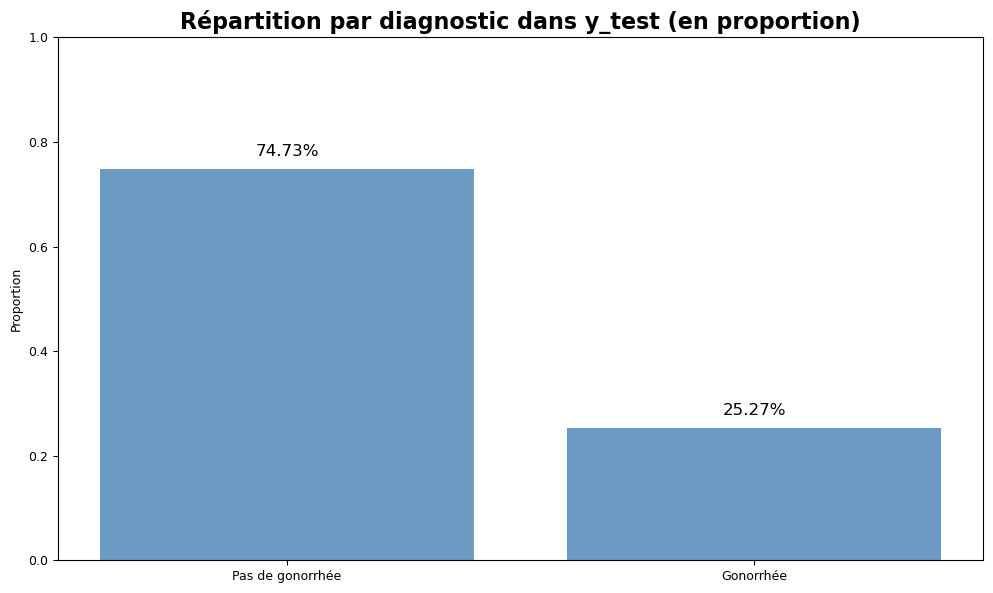

In [60]:
import matplotlib.pyplot as plt

# Calcul des proportions dans y_test
proportions = pd.Series(y_test).value_counts(normalize=True).sort_index()

# Étiquettes correspondant aux classes 0 et 1
labels = ['Pas de gonorrhée', 'Gonorrhée']

# Affichage du graphique
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, proportions, color='steelblue', alpha=0.8)
plt.title("Répartition par diagnostic dans y_test (en proportion)", fontsize=16, fontweight='bold')
plt.ylabel("Proportion")
plt.ylim(0, 1)

# Ajout des pourcentages au-dessus des barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2%}", 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [61]:
print(model.params)


const        -0.053952
AGE          -0.329681
SEXE         -0.349575
ORIENT_SEX   -0.551934
PART          0.482327
MARIE         0.061990
dtype: float64


In [62]:
# print(X_train['CULTURE'].value_counts())
# print(pd.crosstab(X_train['CULTURE'], y_train))

In [86]:
#taux de succès
accm = np.sum(np.diagonal(mcNumpy))/np.sum(mcNumpy) 
print("Taux de succès : %.4f" % (accm)) 
#taux d'erreur 
errm = 1.0 - accm 
print("Taux d'erreur : %.4f" % (errm))

Taux de succès : 0.5347
Taux d'erreur : 0.4653


In [88]:
from sklearn import metrics
# définir la matrice de confusion
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
print(cnf_matrix)
print("Taux de succès: ", metrics.accuracy_score(y_test, y_pred_test))

[[308 381]
 [ 48 185]]
Taux de succès:  0.53470715835141


### La courbe ROC
Nous allons construire la courbe ROC en utilisant le package *scikit-learn*.

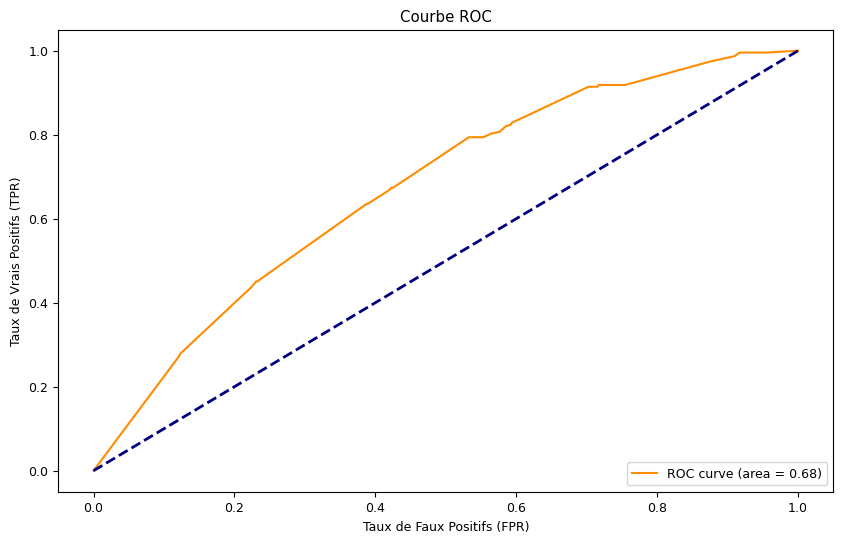

In [805]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import math

# Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Arrondir l'AUC vers le haut à deux décimales
auc_rounded = math.ceil(auc * 100) / 100  # Arrondit vers le haut

# Affichage de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc_rounded:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.legend(loc=4)
plt.title('Courbe ROC')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.show()


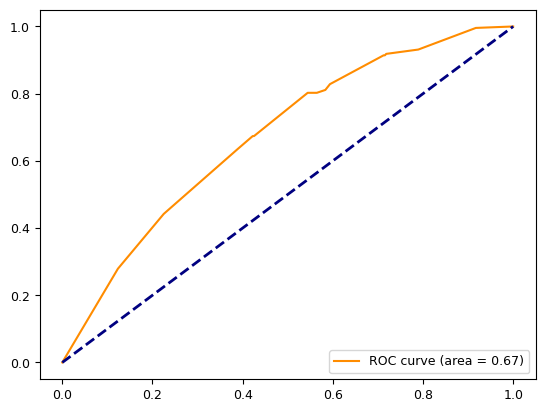

In [594]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [614]:
print(y_pred_proba[:10])  # Affiche les 10 premières probabilités prédites


3002    0.290647
1758    0.212014
2530    0.290647
194     0.399181
240     0.141066
2790    0.225493
2722    0.141066
3004    0.320697
1876    0.320697
1912    0.189310
dtype: float64


In [616]:
# L'aire sous la courbe ROC
print("AUC : %.4f" % (auc))

AUC : 0.6741


In [618]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lr = sm.Logit(y_train, X_train_const)
res = lr.fit()
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.537345
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  DIAGN   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2144
Method:                           MLE   Df Model:                            4
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                 0.04072
Time:                        00:03:57   Log-Likelihood:                -1154.8
converged:                       True   LL-Null:                       -1203.8
Covariance Type:            nonrobust   LLR p-value:                 2.590e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0220      0.214      0.103      0.918      -0.397       0.441
AGE           -0.3417      0.

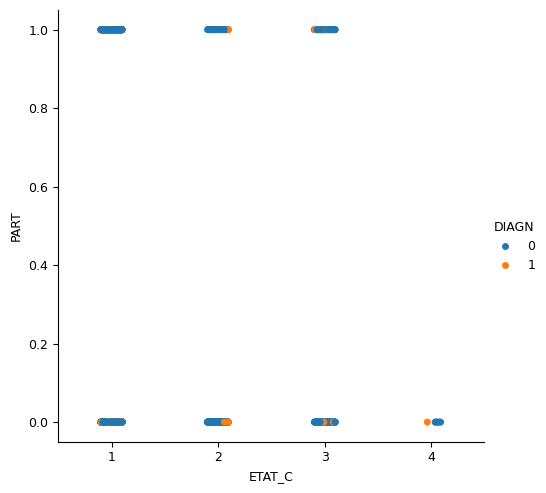

In [619]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.catplot(x="ETAT_C", y="PART", hue="DIAGN", data=df)

In [621]:
#logistic regression using GLM
X_train= X_train.assign(Intercept=1)
GLM_model = sm.GLM(y_train,X_train, family=sm.families.Binomial())
result_GLM = GLM_model.fit()
print(result_GLM.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  DIAGN   No. Observations:                 2149
Model:                            GLM   Df Residuals:                     2144
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1154.8
Date:                Tue, 08 Apr 2025   Deviance:                       2309.5
Time:                        00:03:58   Pearson chi2:                 2.15e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04459
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.3417      0.108     -3.160      0.0

In [623]:
# plt.scatter(X.PART, result_GLM.resid_pearson,color='blue')
# plt.axhline(y=-2, color='r', linestyle='-')
# plt.axhline(y=2, color='r', linestyle='-')
# plt.xlabel('AGE')
# plt.ylabel('Pearson Residuals')

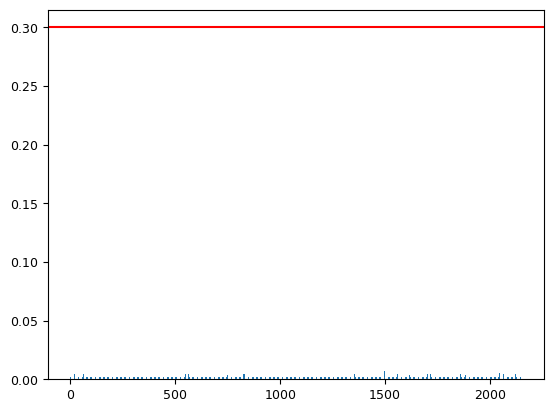

In [625]:
# points leviers
leviers = result_GLM.get_hat_matrix_diag(observed=False)
barWidth = 0.4
r1 = range(len(leviers))
plt.bar(r1, leviers, width = barWidth, linewidth = 2)
plt.axhline(y=6/20, color='r', linestyle='-')

# KNN

In [39]:
#NORMALISER LES DONNEE???
selected_columns = ['AGE', 'SEXE', 'ORIENT_SEX','PART','HISTOIRE']
X = df[selected_columns]
y = df['DIAGN'] 

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Appliquer le KNN avec k=55 (k étant choisi arbitrairement ici)
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=12) # Définir le classifieur KNN avec k=29
classifier.fit(X_train, y_train) # Entraîner le classifieur avec les données normalisées

KNeighborsClassifier(n_neighbors=12)

In [43]:
# Faire des prédictions sur les données de test
y_pred = classifier.predict(X_test) # Prédictions sur le test

In [45]:
# Création d'un tableau de contingence (matrice de confusion) pour évaluer les performances du modèle
y_class = pd.crosstab(index=y_test, columns=y_pred,margins=True) # Calcul de la matrice de confusion
y_class/y_class.loc["All","All"] # Normalisation de la matrice de confusion pour obtenir les proportions

col_0,0,All
DIAGN,,
0,0.747289,0.747289
1,0.252711,0.252711
All,1.000000,1.000000


In [47]:

from sklearn.metrics import accuracy_score 
# Afficher la matrice de confusion et les mesures de classification (précision, rappel, f1-score)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  # Afficher la matrice de confusion
print(classification_report(y_test, y_pred))  # Afficher le rapport de classification
accuracy_score(y_test, y_pred)  # Calculer le score de précision

[[689   0]
 [233   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       689
           1       0.00      0.00      0.00       233

    accuracy                           0.75       922
   macro avg       0.37      0.50      0.43       922
weighted avg       0.56      0.75      0.64       922



C:\Users\joann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\joann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\joann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.7472885032537961

[[689   0]
 [233   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       689
           1       0.00      0.00      0.00       233

    accuracy                           0.75       922
   macro avg       0.37      0.50      0.43       922
weighted avg       0.56      0.75      0.64       922

Accuracy: 0.7473
AUC: 0.6227


C:\Users\joann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\joann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\joann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


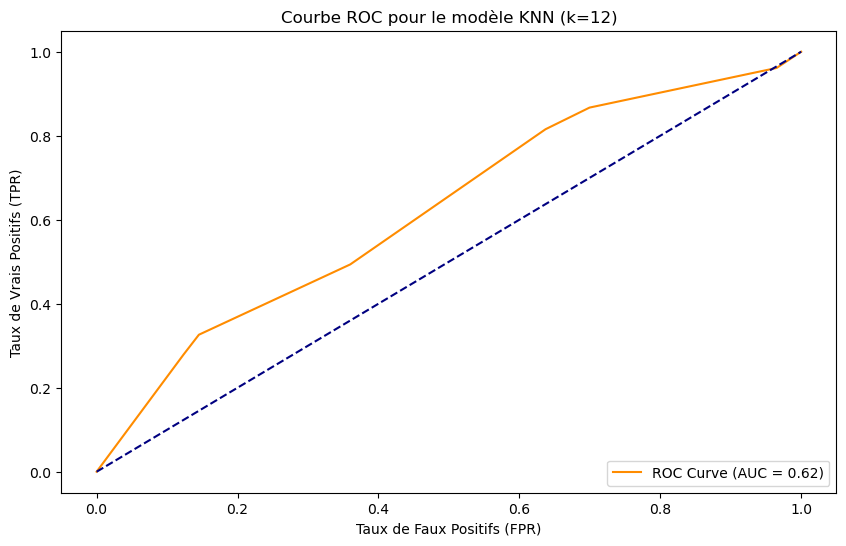

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Pour normaliser les données
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sélection des colonnes pertinentes
selected_columns = ['AGE', 'SEXE', 'ORIENT_SEX', 'PART', 'HISTOIRE']
X = df[selected_columns]
y = df['DIAGN']

# Normaliser les données pour KNN
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Normalisation de toutes les données avant de faire la division

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer le KNN avec k=55
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Prédire les probabilités pour la classe positive (1)

# Afficher la matrice de confusion et le rapport de classification
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculer le score de précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculer la courbe ROC et l'aire sous la courbe (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("Courbe ROC pour le modèle KNN (k=12)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.legend(loc="lower right")
plt.show()



### **Avec différent k**
Calcul de l'erreur moyenne pour différentes valeurs de K (de 1 à 50)

In [288]:
error = [] # création d'un vecteur vide pour l'erreur 

for i in range(1, 55):  
    knn = KNeighborsClassifier(n_neighbors=i) # Définir le classifieur KNN avec k=i
    knn.fit(X_train, y_train) 
    pred_i = knn.predict(X_test) # Prédictions sur les données de test
    #error.append(np.sqrt(mean_squared_error(y_test,pred_i)))
    error.append(np.mean(pred_i != y_test)) # Calculer l'erreur pour chaque valeur de K 
    # moyenne des valeurs de predictions fausse 
    # on enregistre les erreurs pour K de 1 à 49 
    # On observe que la valeur avec K=9 à l'air la meilleure 

Text(0, 0.5, 'Mean Error')

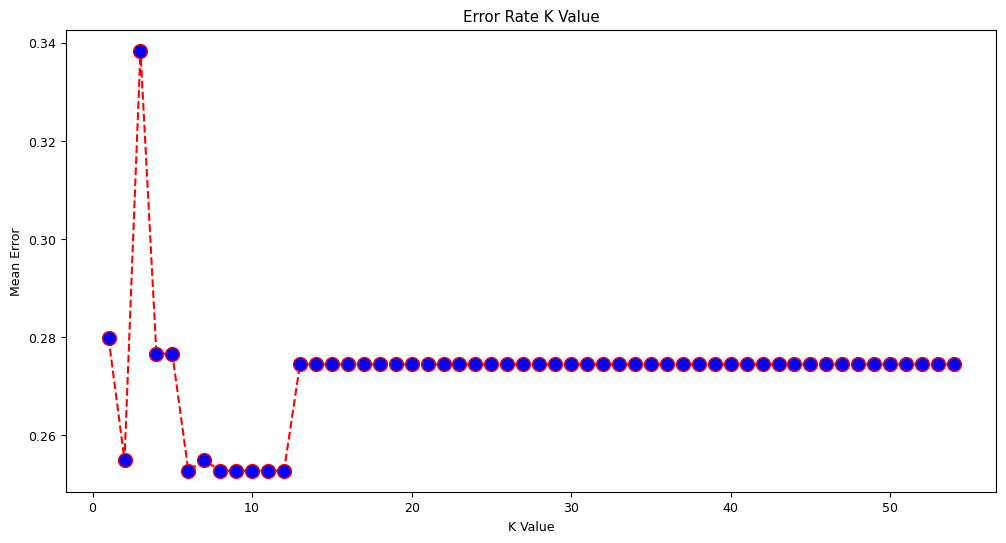

In [289]:
# Tracer l'erreur en fonction des valeurs de K
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 55), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [290]:
# Calcul des erreurs d'entraînement et de test pour différentes valeurs de K
training_accuracy = []
test_accuracy = []

for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i) # Définir le classifieur KNN avec k=i
    knn.fit(X_train,y_train)
    #error.append(np.sqrt(mean_squared_error(y_test,pred_i)))
    test_accuracy.append(knn.fit(X_train,y_train).score(X_test,y_test)) # Calculer l'accuracy de test
    training_accuracy.append(knn.fit(X_train,y_train).score(X_train,y_train)) # Calculer l'accuracy d'entraînement

Text(0, 0.5, 'Accuracy')

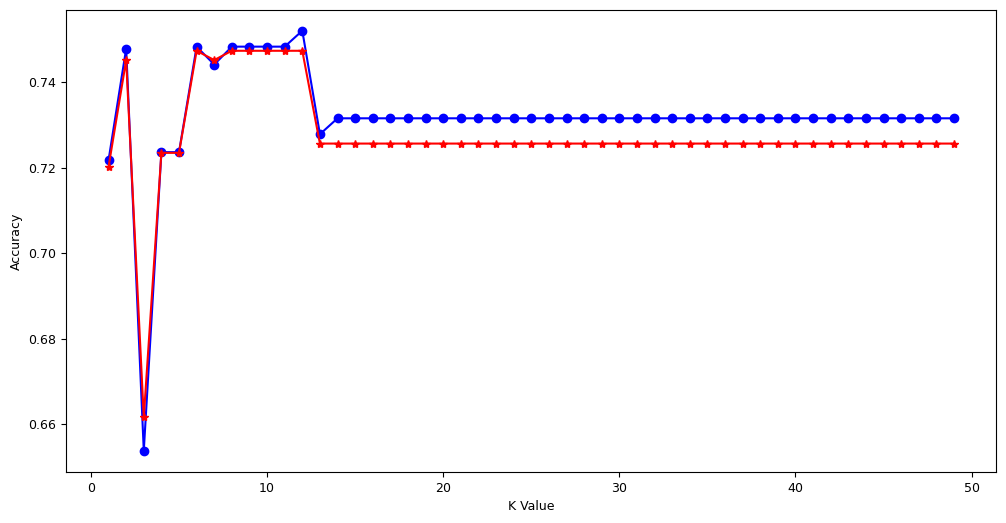

In [292]:
# Tracer l'erreur d'entraînement et d'erreur de test
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50),training_accuracy, 'b-o', ms=6) # accuracy d'entraînement
plt.plot(range(1, 50),test_accuracy, 'r-*', ms=6) # accuracy de test
plt.xlabel('K Value')  
plt.ylabel('Accuracy')

In [294]:
# Calcul des erreurs de classification pour différentes valeurs de K (de 1 à 100)
# meme code qu'avant mais avec plus de valeurs de k
error1 = []
error2 = []

for i in range(1, 55):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    prad_i = knn.predict(X_train)
    #error.append(np.sqrt(mean_squared_error(y_test,pred_i)))
    error1.append(np.mean(pred_i != y_test))  
    error2.append(np.mean(prad_i != y_train))

Text(0, 0.5, ' Mean Error')

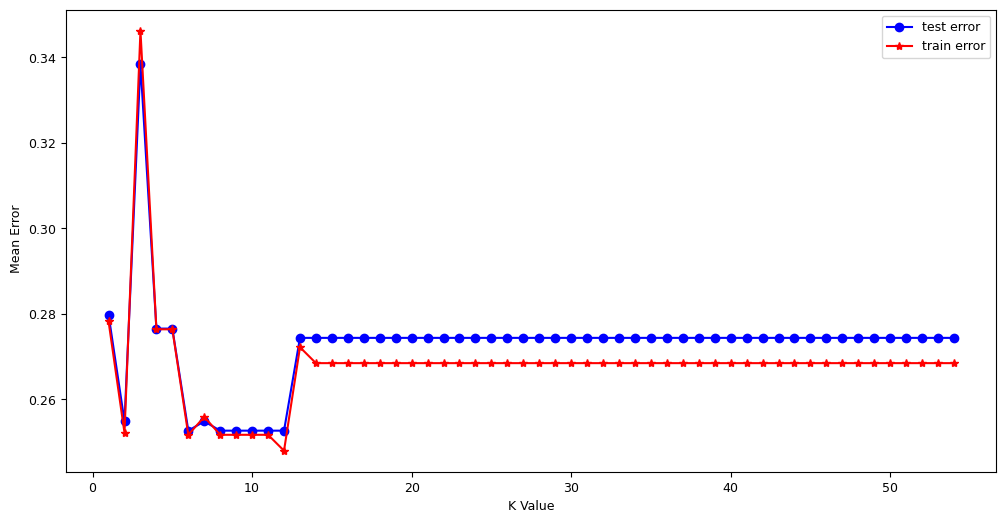

In [295]:
# Tracer l'erreur de classification en fonction des valeurs de K
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 55), error1, 'b-o', ms=6, label='test error') # Erreur de test
plt.plot(range(1, 55), error2, 'r-*', ms=6, label='train error') # Erreur d'entraînement
plt.legend()
plt.xlabel('K Value')  
plt.ylabel(' Mean Error')

In [296]:
# Calcul de l'exactitude pour différentes valeurs de K et affichage du graphique
no_neighbors = np.arange(1, 55)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k) # Définir le classifieur KNN
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train) # Calculer l'exactitude d'entraînement
    test_accuracy[i] = knn.score(X_test, y_test) # Calculer l'exactitude de test

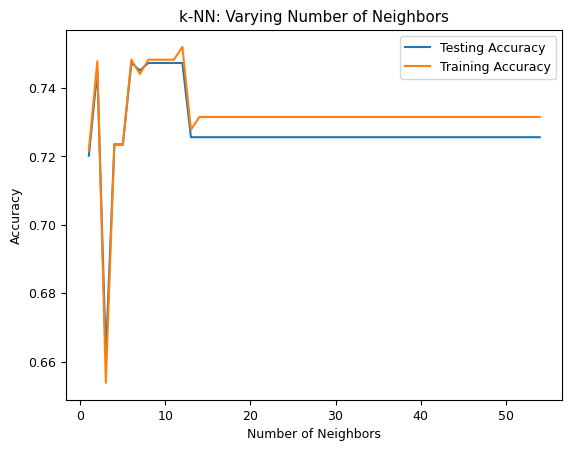

In [297]:
# Tracer l'exactitude en fonction de K pour les ensembles d'entraînement et de test
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy') # Exactitude de test
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy') # Exactitude d'entraînement
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [298]:
#k=12 optimal

<br>
<br>

## **Validation croisée Leave-One-Out (LOOCV)**
Dans la validation croisée Leave-One-Out, chaque échantillon de l'ensemble de test est utilisé comme échantillon de validation tandis que tous les autres sont utilisés pour entraîner le modèle. Cela permet d'évaluer la performance du modèle de manière plus fine, mais peut être plus coûteux en temps de calcul, surtout pour de grands ensembles de données

<br>

In [300]:
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection

In [301]:
knn = KNeighborsClassifier(n_neighbors=10) 
# Initialisation du classifieur KNN avec k=5 (valeur par défaut, peux ajuster)

In [302]:
# Création d'une instance de validation croisée Leave-One-Out (LOOCV)
loocv = model_selection.LeaveOneOut() 
results = model_selection.cross_val_score(knn, X, y, cv=loocv) # Calcul des scores de validation croisée pour chaque instance du jeu de données

# Affichage de la précision moyenne et de son écart-type
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0)) 

Accuracy: 74.699% (43.474%)


In [303]:
k_range = range(1,55)

cv_scores = []

# Effectuer la validation croisée Leave-One-Out pour chaque valeur de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, X, y, cv=loocv, scoring='accuracy') # Calcul des scores de validation croisée (accuracy
    cv_scores.append(scores.mean())
# on laisse varier le K de 1 à 49 mais pour le LOOCV ici 

KeyboardInterrupt: 

In [ ]:
# Changer les scores pour l'erreur de classification (misclassification error)
MSE = [1 - x for x in cv_scores]

# Trouver la valeur de k qui minimise l'erreur de classification
optimal_k = MSE.index(min(MSE))
print("The optimal number of neighbors is %d" % optimal_k) # Affichage du k optimal, ici 18

In [ ]:
# Graphique de l'erreur de classification en fonction de k
plt.plot(k_range, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

<br>
<br>

## **Validation croisée 10-fold**
Contrairement au LOOCV, la validation croisée 10-fold divise l'ensemble de données en 10 sous-ensembles (ou "folds"). Le modèle est entraîné sur 9 folds et testé sur le 10e fold. Ce processus est répété 10 fois, chaque fold étant utilisé comme test à tour de rôle. 

<br>

In [307]:
from sklearn.model_selection import cross_val_score

k_range = range(1,55)

cv_scores = []

# Effectuer la validation croisée 10-fold pour chaque valeur de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') # Calcul des scores de validation croisée (accuracy) pour 10 folds
    cv_scores.append(scores.mean())

In [309]:
# Changer les scores pour l'erreur de classification (misclassification error)
MSE = [1 - x for x in cv_scores]

In [311]:
print('Length of list', len(cv_scores))
print('Max of list', max(cv_scores))

# Trouver la valeur de k qui minimise l'erreur de classification
optimal_k = MSE.index(min(MSE))
print("The optimal number of neighbors is %d" % optimal_k)

Length of list 54
Max of list 0.747326668115627
The optimal number of neighbors is 51


In [313]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cross-validated accuracy')

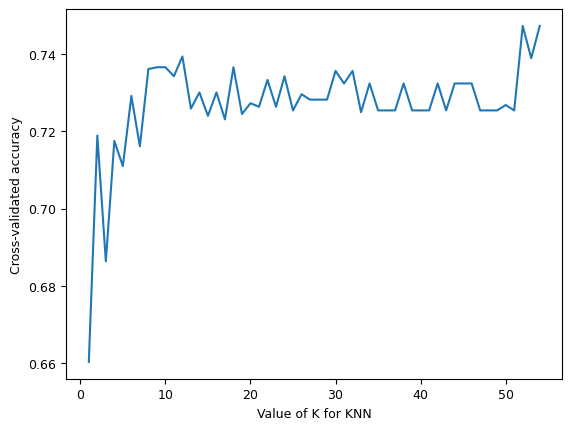

In [315]:
# Graphique montrant comment la précision change avec différentes valeurs de k
plt.plot(k_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
# on cherche accuracy la + élevée  

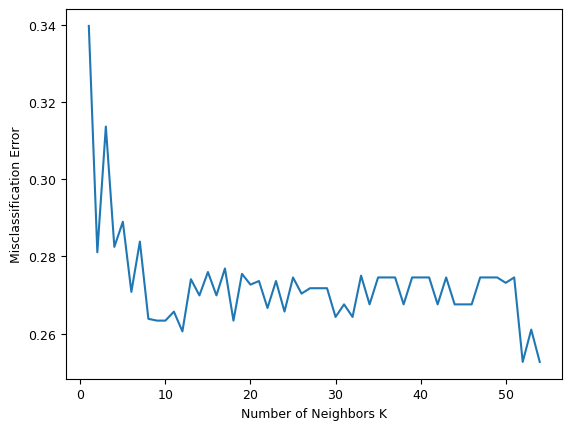

In [317]:
# Graphique de l'erreur de classification en fonction de k
plt.plot(k_range, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
# on peut aussi regarder l'erreur de classification la + petite 

In [664]:
#k=39 optimal

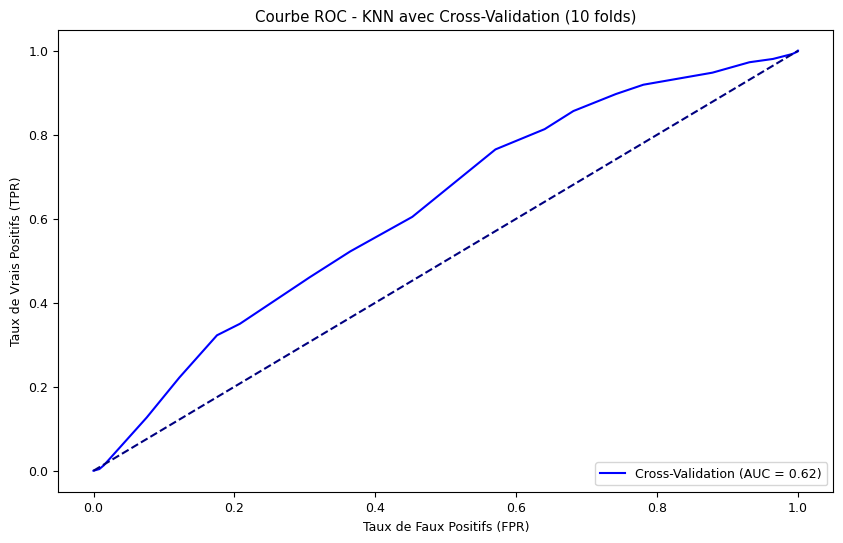

In [325]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Appliquer le KNN avec k=39
classifier = KNeighborsClassifier(n_neighbors=39)

# Prédire les probabilités en utilisant cross-validation (10-fold)
y_pred_proba_cv = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')[:, 1]

# Calculer la courbe ROC et l'AUC
fpr_cv, tpr_cv, _ = roc_curve(y, y_pred_proba_cv)
auc_cv = roc_auc_score(y, y_pred_proba_cv)

# Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_cv, tpr_cv, label=f'Cross-Validation (AUC = {auc_cv:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("Courbe ROC - KNN avec Cross-Validation (10 folds)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.legend(loc="lower right")
plt.show()

k = 1, AUC = 0.4952
k = 2, AUC = 0.5304
k = 3, AUC = 0.5394
k = 4, AUC = 0.5486
k = 5, AUC = 0.5660
k = 6, AUC = 0.5504
k = 7, AUC = 0.5491
k = 8, AUC = 0.5532
k = 9, AUC = 0.5446
k = 10, AUC = 0.5562
k = 11, AUC = 0.5676
k = 12, AUC = 0.5687
k = 13, AUC = 0.5785
k = 14, AUC = 0.5785
k = 15, AUC = 0.5662
k = 16, AUC = 0.5658
k = 17, AUC = 0.5782
k = 18, AUC = 0.5871
k = 19, AUC = 0.5856
k = 20, AUC = 0.5915
k = 21, AUC = 0.5932
k = 22, AUC = 0.5967
k = 23, AUC = 0.5994
k = 24, AUC = 0.5989
k = 25, AUC = 0.5963
k = 26, AUC = 0.6026
k = 27, AUC = 0.6047
k = 28, AUC = 0.6063
k = 29, AUC = 0.6069
k = 30, AUC = 0.6136
k = 31, AUC = 0.6193
k = 32, AUC = 0.6186
k = 33, AUC = 0.6195
k = 34, AUC = 0.6209
k = 35, AUC = 0.6203
k = 36, AUC = 0.6204
k = 37, AUC = 0.6213
k = 38, AUC = 0.6251
k = 39, AUC = 0.6315
k = 40, AUC = 0.6303
k = 41, AUC = 0.6324
k = 42, AUC = 0.6343
k = 43, AUC = 0.6323
k = 44, AUC = 0.6358
k = 45, AUC = 0.6381
k = 46, AUC = 0.6377
k = 47, AUC = 0.6389
k = 48, AUC = 0.6355
k

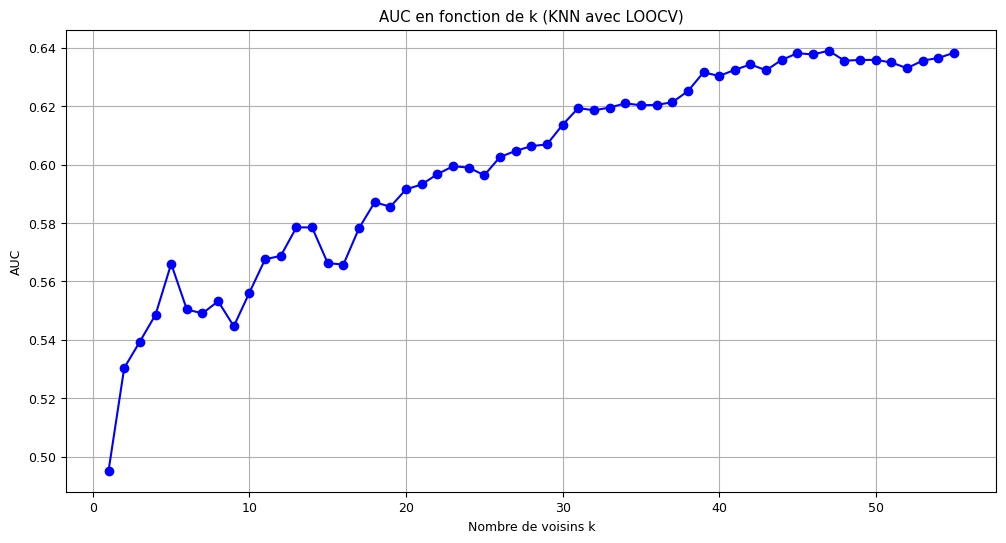

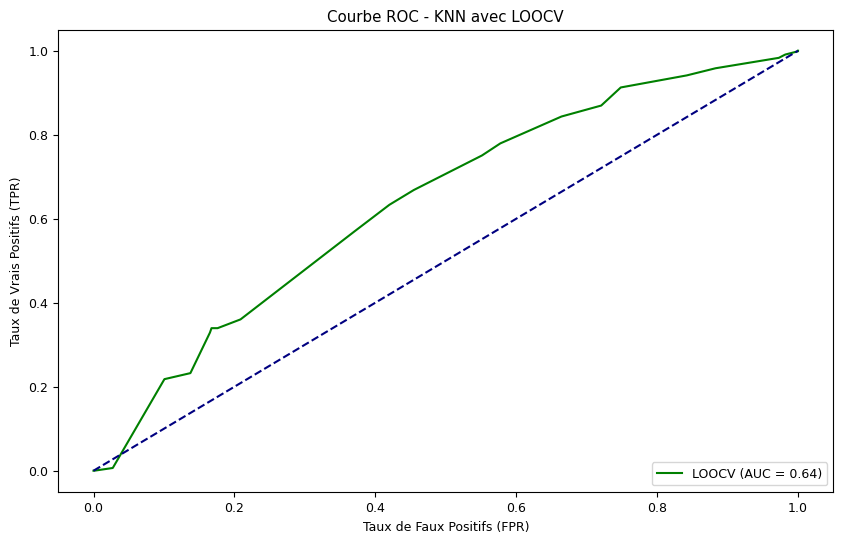

In [720]:
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialiser le modèle KNN avec k=47
classifier = KNeighborsClassifier(n_neighbors=47)

# Initialiser la méthode LOOCV
loo = LeaveOneOut()

# Prédire les probabilités en utilisant LOOCV
y_pred_proba_loocv = cross_val_predict(classifier, X, y, cv=loo, method='predict_proba')[:, 1]

# Calculer la courbe ROC et l'AUC
fpr_loocv, tpr_loocv, _ = roc_curve(y, y_pred_proba_loocv)
auc_loocv = roc_auc_score(y, y_pred_proba_loocv)

# Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_loocv, tpr_loocv, label=f'LOOCV (AUC = {auc_loocv:.2f})', color='green')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("Courbe ROC - KNN avec LOOCV")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.legend(loc="lower right")
plt.show()


# COMPARER KNN ET REG LOGISTIC voire a la fin pour les 3 modeel

Both KNN and Logistic Regression are performing identically in terms of confusion matrix and classification metrics.

AUC score suggests that Logistic Regression is slightly better than KNN.

However, the poor Recall for the positive class (1) indicates that both models are biased towards predicting negatives (0).

# Decision tree

In [267]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 

[0.7519780994199599, 0.7519780994199599, 0.7519780994199599, 0.7473269366292623, 0.7459315877920529, 0.743602753835312, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724, 0.7426725212771724]
Length of list 28
Max of list 0.7519780994199599


(0, 0.7519780994199599)

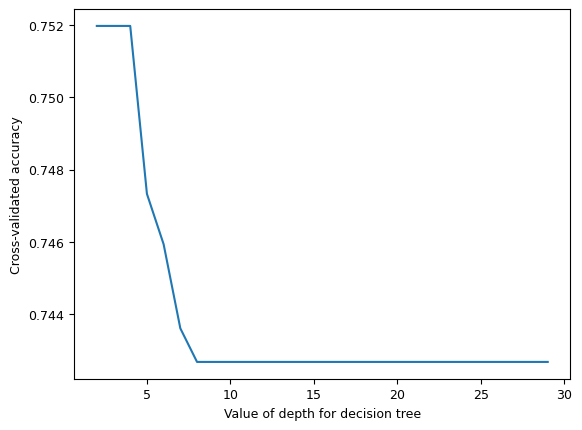

In [283]:
###############################################################################
#Cross-Validation
depth_range = range(2, 30)
depth = []
for i in depth_range:
    clf = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=i, min_samples_leaf=5)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=4)
    depth.append((scores.mean()))
print(depth)

print('Length of list', len(depth))
print('Max of list', max(depth))
# plot how accuracy changes as we vary depth

plt.plot(depth_range, depth)
plt.xlabel('Value of depth for decision tree')
plt.ylabel('Cross-validated accuracy')

#We can extract the position of max with:
max(enumerate(depth), key=(lambda x: x[1]))

In [293]:
#without max_depth
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
    # Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
        accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
        classification_report(y_test, y_pred)) 
      
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini")
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 


clf_gini = train_using_gini(X_train, X_test, y_train) 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 

Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [328]:
#without max_depth
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
    # Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
        accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
        classification_report(y_test, y_pred)) 

###############################################################################
#changing the max depth
#max_depth=3
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=5, min_samples_leaf=5) 
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

clf_gini = train_using_gini(X_train, X_test, y_train) 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 

Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [331]:
#74.72885032537961

In [280]:
from sklearn.model_selection import GridSearchCV

# parameters = {'max_depth':range(2,30),'min_samples_leaf':range(2,7)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=-1)
# clf.fit(X=X_train, y=y_train)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

# set of parameters to test
parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 2, 3, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }
clf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy', n_jobs=-1)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)
print(clf.best_estimator_) 


0.7519780994199599 {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_leaf_nodes=5)


In [225]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf_gini = DecisionTreeClassifier(criterion="gini", 
                                  max_depth=2,  # You can tune this value
                                  min_samples_leaf=1,  # You can tune this value
                                  random_state=42)

# Train the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [227]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = clf_gini.predict(X_test)

# Print Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7472885032537961
Confusion Matrix:
 [[689   0]
 [233   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       689
           1       0.00      0.00      0.00       233

    accuracy                           0.75       922
   macro avg       0.37      0.50      0.43       922
weighted avg       0.56      0.75      0.64       922



IndexError: list index out of range

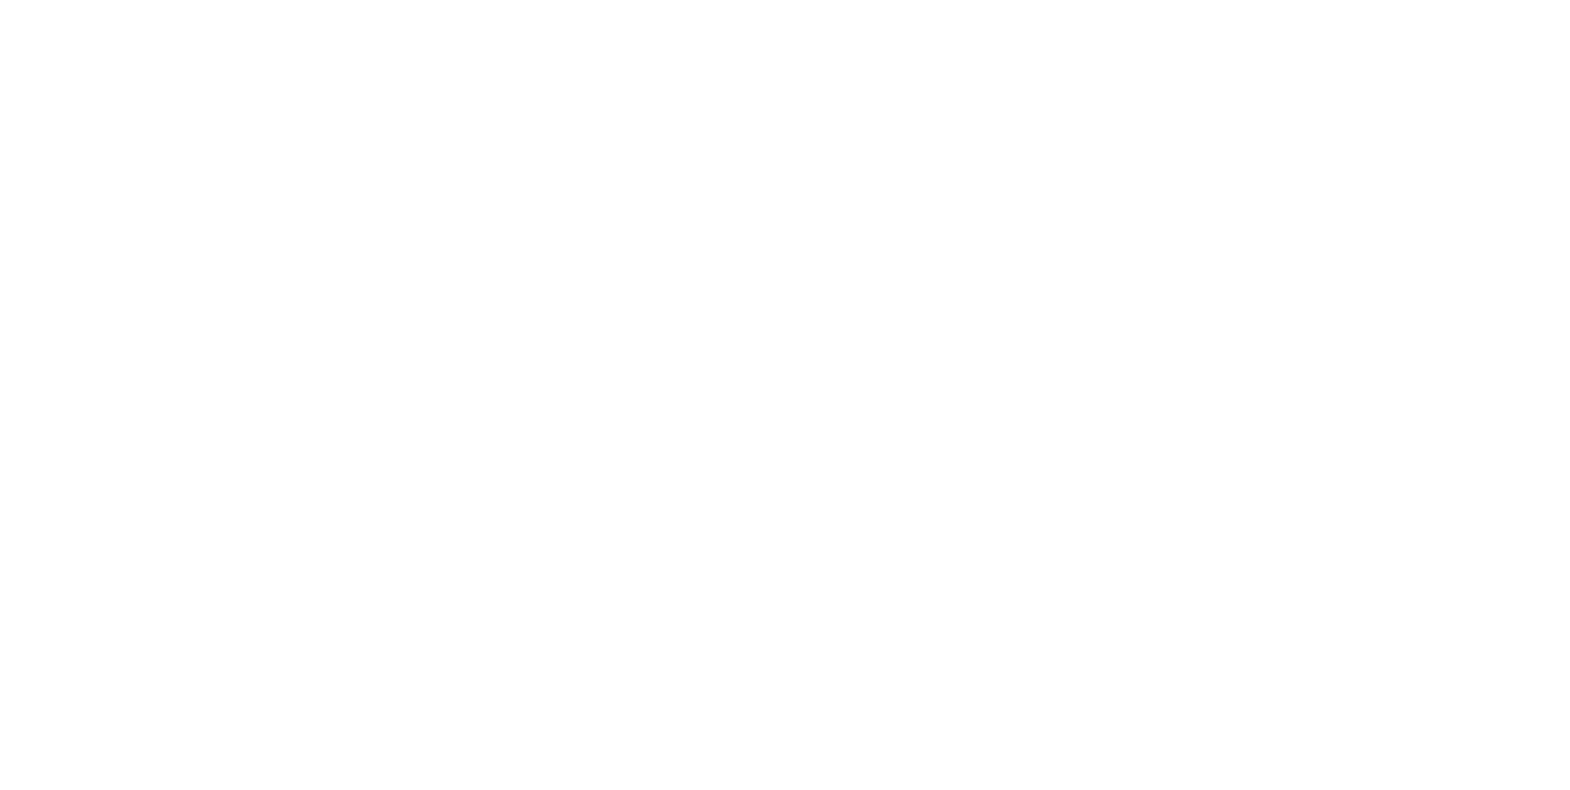

In [229]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini, feature_names=selected_columns, class_names=['0', '1'], filled=True)
plt.show()


In [231]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
parameters = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10, 20],
    "max_depth": range(2, 20),
    "min_samples_leaf": range(1, 10),
    "max_leaf_nodes": [None, 5, 10, 20]
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(criterion="gini"), parameters, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7519780994199599


In [221]:
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth= 2 , max_leaf_nodes= None, min_samples_leaf= 1, min_samples_split= 2)
# Train the model
clf_gini.fit(X_train, y_train)


# Make predictions
y_pred = clf_gini.predict(X_test)

# Print Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7472885032537961
Confusion Matrix:
 [[689   0]
 [233   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       689
           1       0.00      0.00      0.00       233

    accuracy                           0.75       922
   macro avg       0.37      0.50      0.43       922
weighted avg       0.56      0.75      0.64       922



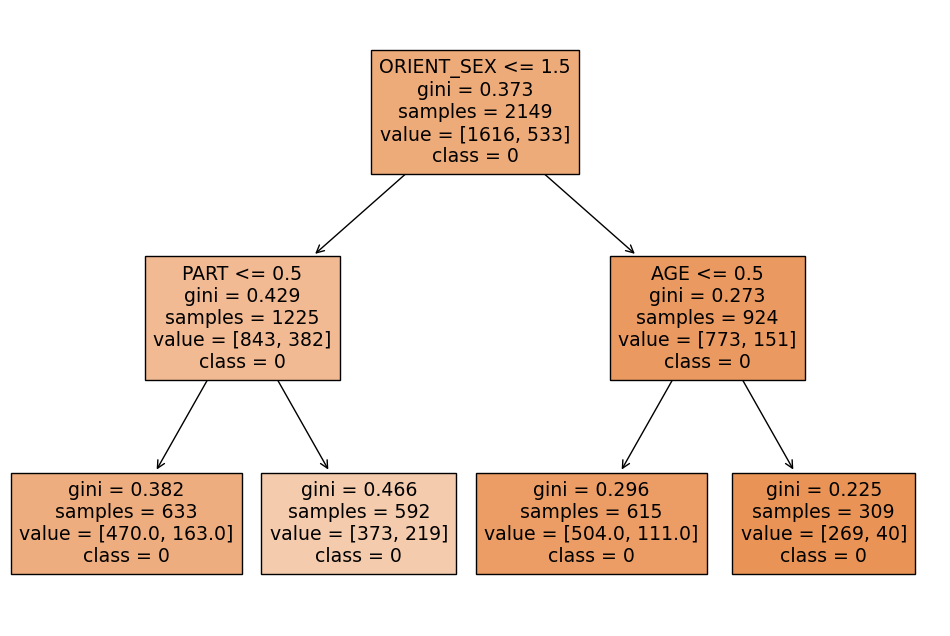

In [233]:
from sklearn import tree
import matplotlib.pyplot as plt
selected_columns = X_train.columns.tolist()


plt.figure(figsize=(12, 8))
tree.plot_tree(grid_search.best_estimator_, feature_names=selected_columns, class_names=['0', '1'], filled=True)
plt.show()


In [102]:
#trop bizarre egal a 0 ??????

In [686]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the set of parameters to test
parameters = {
    "criterion": ["gini", "entropy"],  # Test both Gini Index and Entropy
    "min_samples_split": [2, 5, 10, 20],  # Minimum samples required to split a node
    "max_depth": [None, 2, 5, 10],  # Maximum depth of the tree
    "min_samples_leaf": [1, 2, 3, 5, 10],  # Minimum samples required at a leaf node
    "max_leaf_nodes": [None, 5, 10, 20],  # Maximum number of leaf nodes allowed
}

# Initialize the Decision Tree Classifier (no parameters set here)
clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                           param_grid=parameters,
                           scoring='accuracy',  # You can also try 'recall', 'precision', 'f1', or 'roc_auc'
                           n_jobs=-1,  # Use all available cores for computation
                           cv=5,  # 5-fold Cross-Validation
                           verbose=1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best estimator
tree_model = grid_search.best_estimator_

# Print the best score and best parameters
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", tree_model)


Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Best Score: 0.7519780994199599
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(min_samples_leaf=3)


In [238]:
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth= 4, max_leaf_nodes= None, min_samples_leaf= 3, min_samples_split= 2)

In [240]:
# Train the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

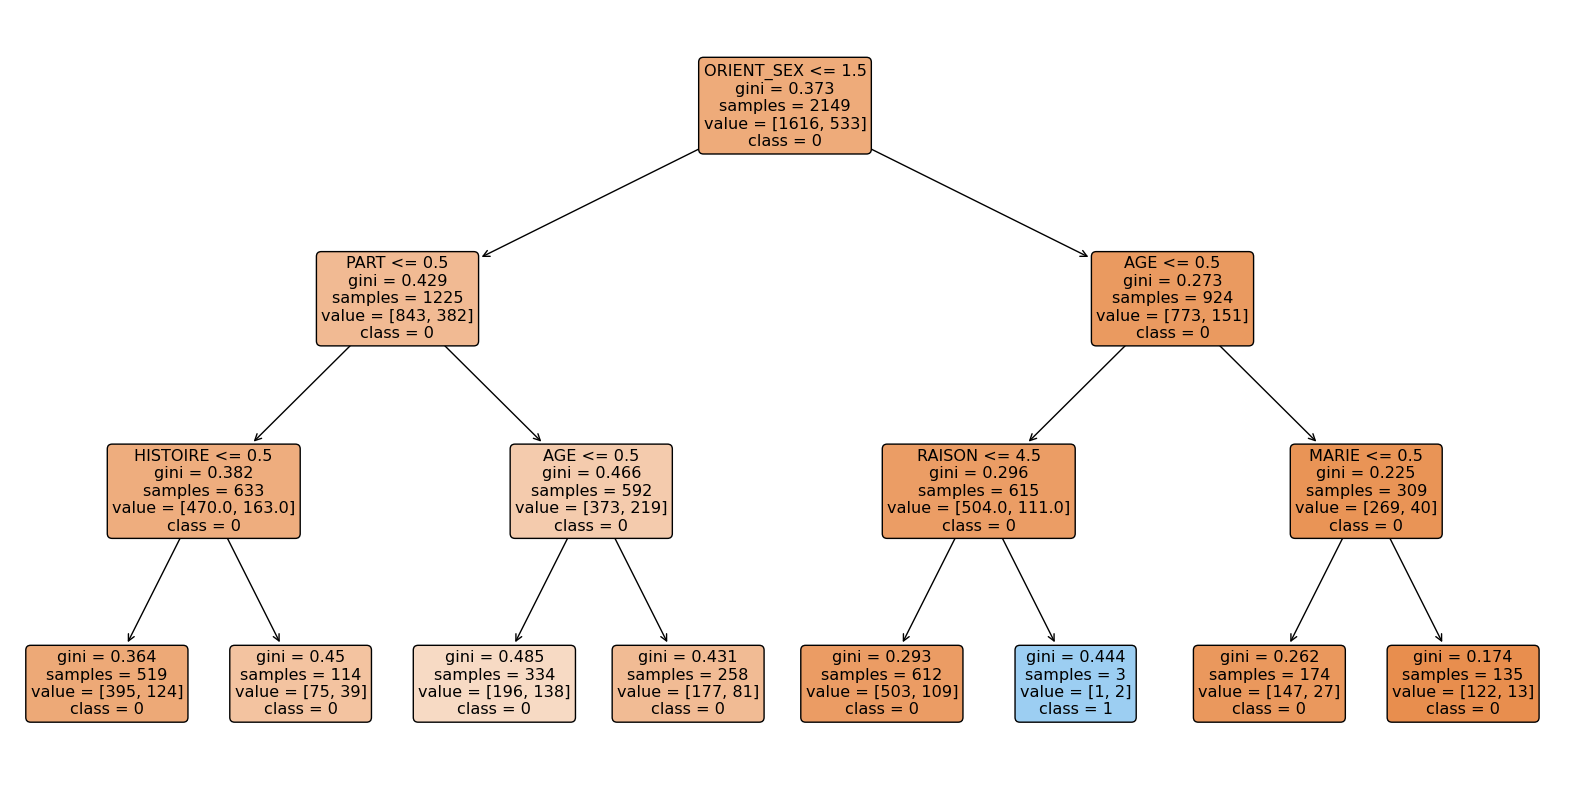

In [246]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation de l'arbre de décision
clf_gini = DecisionTreeClassifier(
    criterion="gini", 
    max_depth=3, 
    max_leaf_nodes=None, 
    min_samples_leaf=3, 
    min_samples_split=2,
    random_state=42  # Pour garantir des résultats reproductibles
)

# Entraînement du modèle sur tes données d'entraînement
clf_gini.fit(X_train, y_train)
import matplotlib.pyplot as plt
from sklearn import tree

# Liste des noms des variables (cela doit correspondre à tes colonnes d'entrée)
feature_names = X_train.columns.tolist()  # Assure-toi que c'est bien la liste des variables utilisées

# Création de la figure
plt.figure(figsize=(20, 10))

# Visualisation de l'arbre
tree.plot_tree(
    clf_gini, 
    feature_names=feature_names,  # Les noms des variables
    class_names=['0', '1'],  # Les classes que tu essayes de prédire
    filled=True, 
    rounded=True
)
plt.show()


In [689]:
# Make predictions
y_pred = clf_gini.predict(X_test)

# Print Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7472885032537961
Confusion Matrix:
 [[689   0]
 [233   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       689
           1       0.00      0.00      0.00       233

    accuracy                           0.75       922
   macro avg       0.37      0.50      0.43       922
weighted avg       0.56      0.75      0.64       922



# Comparaison

In [722]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

# Entraînement du modèle de Régression Logistique
X_train_const = sm.add_constant(X_train)
model_logit = sm.Logit(y_train, X_train_const).fit(disp=0)

# Prédictions KNN
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)[:, 1]

# Prédictions Régression Logistique
X_test_const = sm.add_constant(X_test)
y_pred_logit_proba = model_logit.predict(X_test_const)
y_pred_logit = np.where(y_pred_logit_proba > 0.4, 1, 0)

# KNN Model
y_pred_knn = knn.predict(X_test)  # Your KNN model

# Logistic Regression Model
y_pred_logit = np.where(y_pred_logit_proba > 0.4, 1, 0)  # Your Logistic Regression model

# Decision Tree Model (Best from GridSearchCV)
y_pred_tree = grid_search.best_estimator_.predict(X_test)  # Your Decision Tree model #badel my a3moul clf_gini
#.fit w byerja3 .predict je fais toute ca 


In [724]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n----- {model_name} Model Performance -----")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    try:
        auc_score = roc_auc_score(y_test, y_pred)
        print("AUC Score:", auc_score)
    except ValueError:
        print("AUC Score: Not Applicable (Check prediction format)")


In [726]:
# Evaluate all models
evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_logit, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")


----- KNN Model Performance -----
Accuracy: 0.7472885032537961
Confusion Matrix:
 [[689   0]
 [233   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       689
           1       0.00      0.00      0.00       233

    accuracy                           0.75       922
   macro avg       0.37      0.50      0.43       922
weighted avg       0.56      0.75      0.64       922

AUC Score: 0.5

----- Logistic Regression Model Performance -----
Accuracy: 0.7472885032537961
Confusion Matrix:
 [[682   7]
 [226   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85       689
           1       0.50      0.03      0.06       233

    accuracy                           0.75       922
   macro avg       0.63      0.51      0.46       922
weighted avg       0.69      0.75      0.65       922

AUC Score: 0.509941633392925

----- Decision Tree Model

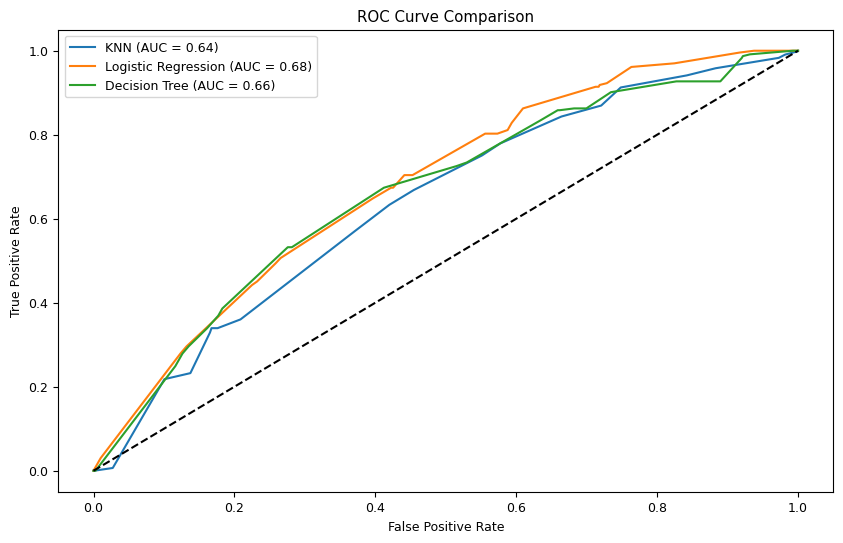

In [736]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Generate prediction probabilities for ROC Curve
y_pred_prob_knn = cross_val_predict(knn, X, y, cv=loo, method='predict_proba')[:, 1]
y_pred_prob_logit = model_logit.predict(X_test_const)
y_pred_prob_tree = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Plot ROC Curve for each model
plt.figure(figsize=(10, 6))

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y, y_pred_prob_knn)
auc_knn = roc_auc_score(y, y_pred_prob_knn)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_score(y, y_pred_prob_knn)))

# Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logit)
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_logit)))

# Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob_tree)))

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()


In [ ]:
# Best Model: Logistic Regression (AUC = 0.68)
# Second Best: Decision Tree (AUC = 0.66)
# Third Best: KNN (AUC = 0.65)
# Even though all models have the same accuracy, Logistic Regression has the highest AUC, meaning it is better at distinguishing between positive and negative cases.

# Carasterisation du groupe 

In [740]:
X_train

array([[ 1.28976221, -0.542349  , -0.85676634, -0.73230331, -0.47070083],
       [-0.77533672, -0.542349  ,  1.16717937, -0.73230331, -0.47070083],
       [ 1.28976221, -0.542349  , -0.85676634,  1.3655544 , -0.47070083],
       ...,
       [-0.77533672,  1.84383119,  1.16717937, -0.73230331, -0.47070083],
       [ 1.28976221, -0.542349  ,  1.16717937, -0.73230331,  2.1244917 ],
       [-0.77533672,  1.84383119,  1.16717937, -0.73230331, -0.47070083]])

In [746]:
import statsmodels.api as sm
selected_columns = ['AGE', 'SEXE', 'ORIENT_SEX','PART']
X = df[selected_columns]
y = df['DIAGN']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_const = sm.add_constant(X_train)
lr = sm.Logit(y_train, X_train_const)
model = lr.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.537345
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  DIAGN   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2144
Method:                           MLE   Df Model:                            4
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                 0.04072
Time:                        00:32:58   Log-Likelihood:                -1154.8
converged:                       True   LL-Null:                       -1203.8
Covariance Type:            nonrobust   LLR p-value:                 2.590e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0220      0.214      0.103      0.918      -0.397       0.441
AGE           -0.3417      0.

In [135]:
#histoire meme pas significatif au seuil de 5%

In [748]:
# Calculate odds ratios
odds_ratios = pd.Series(np.exp(model.params), index=X.columns)
print(odds_ratios.sort_values(ascending=False))

PART          1.621521
AGE           0.710568
SEXE          0.703304
ORIENT_SEX    0.569920
dtype: float64


In [ ]:
#An odds ratio of 1.63 means that for each additional unit increase in PART, the odds of having Gonorrhea increase by 63%
#An odds ratio of 1.12 means that having a positive history of contact increases the risk by 12%.
#Specifically, for each unit increase in age, the odds of having Gonorrhea decrease by 29% (1 - 0.71 = 0.29).
#This low odds ratio indicates that certain sexual orientations are associated with a reduced risk (by 43%).
#An odds ratio of 0.69 suggests that being of a certain sex (female) reduces the odds by 31%.

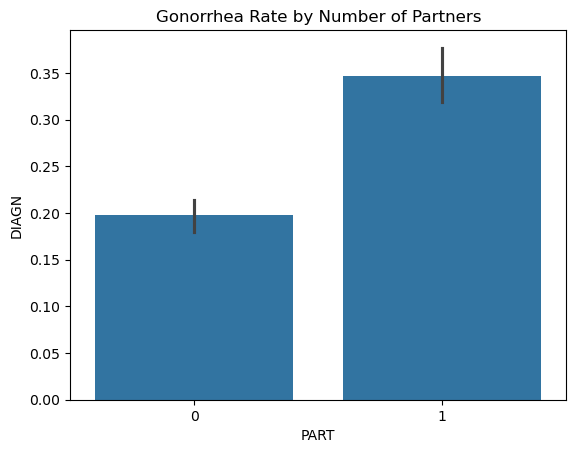

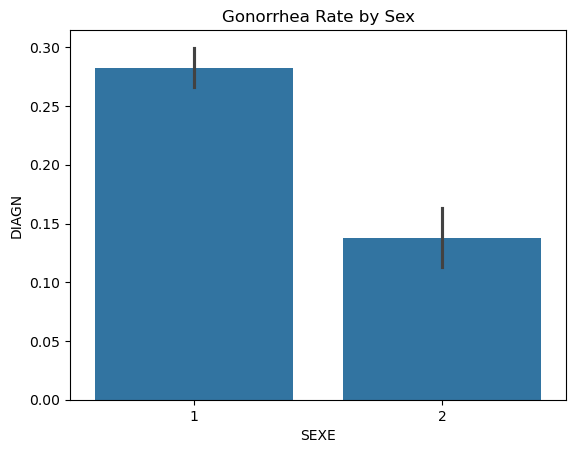

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare Gonorrhea rates by number of partners (PART)
sns.barplot(x='PART', y='DIAGN', data=df)
plt.title('Gonorrhea Rate by Number of Partners')
plt.show()

# Compare by SEXE
sns.barplot(x='SEXE', y='DIAGN', data=df)
plt.title('Gonorrhea Rate by Sex')
plt.show()


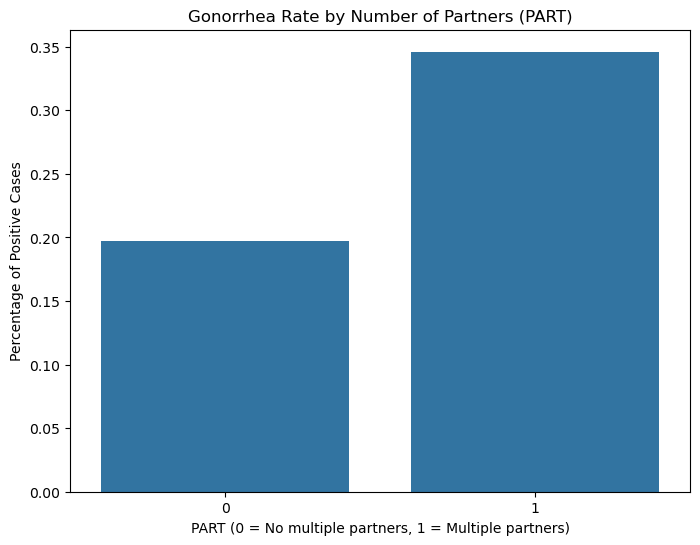

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='PART', y='DIAGN', data=df, ci=None)
plt.title('Gonorrhea Rate by Number of Partners (PART)')
plt.xlabel('PART (0 = No multiple partners, 1 = Multiple partners)')
plt.ylabel('Percentage of Positive Cases')
plt.show()


In [750]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import itertools

#  Définir les variables binaires
selected_columns = ['AGE', 'SEXE', 'ORIENT_SEX', 'PART']
X = df[selected_columns]
y = df['DIAGN']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajouter une constante pour l'intercept
X_train_const = sm.add_constant(X_train)

# Construire le modèle de régression logistique
lr = sm.Logit(y_train, X_train_const)
model = lr.fit()
print(model.summary())

#  Récupérer les coefficients du modèle
intercept = model.params['const']
coefficients = {col: model.params[col] for col in selected_columns}

#  Générer toutes les combinaisons possibles des variables binaires (0 ou 1)
combinations = list(itertools.product([0, 1], repeat=len(selected_columns)))

# Calculer les log-odds, odds ratios et probabilités pour chaque combinaison
results = []
for combination in combinations:
    log_odds = intercept
    description = {}

    # Calcul des log-odds en fonction de chaque combinaison de variables binaires
    for i, var in enumerate(selected_columns):
        log_odds += coefficients[var] * combination[i]
        description[var] = combination[i]

    # Calcul des odds ratio et de la probabilité
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    
    # Stocker les résultats
    results.append({
        **description,
        'Log-Odds': log_odds,
        'Odds Ratio': odds,
        'Probability': probability
    })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)
print("\nRésultats pour chaque combinaison :")
print(results_df)


Optimization terminated successfully.
         Current function value: 0.537345
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  DIAGN   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2144
Method:                           MLE   Df Model:                            4
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                 0.04072
Time:                        00:37:44   Log-Likelihood:                -1154.8
converged:                       True   LL-Null:                       -1203.8
Covariance Type:            nonrobust   LLR p-value:                 2.590e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0220      0.214      0.103      0.918      -0.397       0.441
AGE           -0.3417      0.

L'analyse des résultats obtenus par la régression logistique indique que certains groupes d'individus sont plus susceptibles de recevoir un diagnostic positif. En particulier, les individus les plus à risque semblent être ceux qui sont jeunes (AGE = 0), hétérosexuels (ORIENT_SEX = 0), et qui ont un nombre élevé de partenaires (PART = 1). La probabilité calculée pour cette combinaison est relativement élevée (environ 62.4%), suggérant que l'accumulation de ces caractéristiques augmente significativement le risque.

En revanche, les femmes (SEXE = 1) et les personnes âgées de 30 ans ou plus (AGE = 1) présentent généralement des probabilités plus faibles, même lorsqu'elles ont plusieurs partenaires. Cela suggère que le facteur de risque lié au nombre de partenaires semble avoir un effet plus marqué chez les hommes jeunes. De plus, l'orientation sexuelle (ORIENT_SEX) semble influencer le risque : les individus qui ne sont pas hétérosexuels ont des probabilités globalement plus faibles, ce qui pourrait refléter un comportement ou des facteurs de risque spécifiques qui ne sont pas directement capturés par ce modèle simplifié.

Ainsi, cette analyse indique que les hommes jeunes, hétérosexuels, avec un nombre élevé de partenaires sont les plus exposés, tandis que les femmes et les personnes de 30 ans ou plus semblent moins à risque, quelle que soit leur orientation sexuelle ou leur nombre de partenaires.

In [754]:
X

,AGE,SEXE,ORIENT_SEX,PART
0,0,1,1,1
1,0,1,1,0
2,0,1,1,0
3,0,1,1,1
4,0,1,1,0
...,...,...,...,...
3138,0,1,2,0
3139,0,1,2,1
3140,0,2,2,1
3141,1,1,1,0


In [335]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import itertools

#  Définir les variables d'entrée
selected_columns = ['AGE', 'SEXE', 'ORIENT_SEX', 'PART']
X = df[selected_columns]
y = df['DIAGN']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajouter une constante pour l'intercept
X_train_const = sm.add_constant(X_train)

# Construire le modèle de régression logistique
lr = sm.Logit(y_train, X_train_const)
model = lr.fit()
print(model.summary())

#  Récupérer les coefficients du modèle
intercept = model.params['const']
coefficients = {col: model.params[col] for col in selected_columns}

#  Générer toutes les combinaisons possibles
combinations = list(itertools.product([0, 1], [1, 0], [0, 1], [0, 1]))

# Calculer les log-odds, odds ratios et probabilités pour chaque combinaison
results = []
for combination in combinations:
    log_odds = intercept
    description = {}

    # Calcul des log-odds en fonction de chaque combinaison de variables
    for i, var in enumerate(selected_columns):
        log_odds += coefficients[var] * combination[i]
        description[var] = combination[i]

    # Calcul des odds ratio et de la probabilité
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    
    # Stocker les résultats
    results.append({
        **description,
        'Log-Odds': log_odds,
        'Odds Ratio': odds,
        'Probability': probability
    })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)
print("\nRésultats pour chaque combinaison :")
print(results_df)


Optimization terminated successfully.
         Current function value: 0.537345
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  DIAGN   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2144
Method:                           MLE   Df Model:                            4
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                 0.04072
Time:                        14:22:04   Log-Likelihood:                -1154.8
converged:                       True   LL-Null:                       -1203.8
Covariance Type:            nonrobust   LLR p-value:                 2.590e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0220      0.214      0.103      0.918      -0.397       0.441
AGE           -0.3417      0.

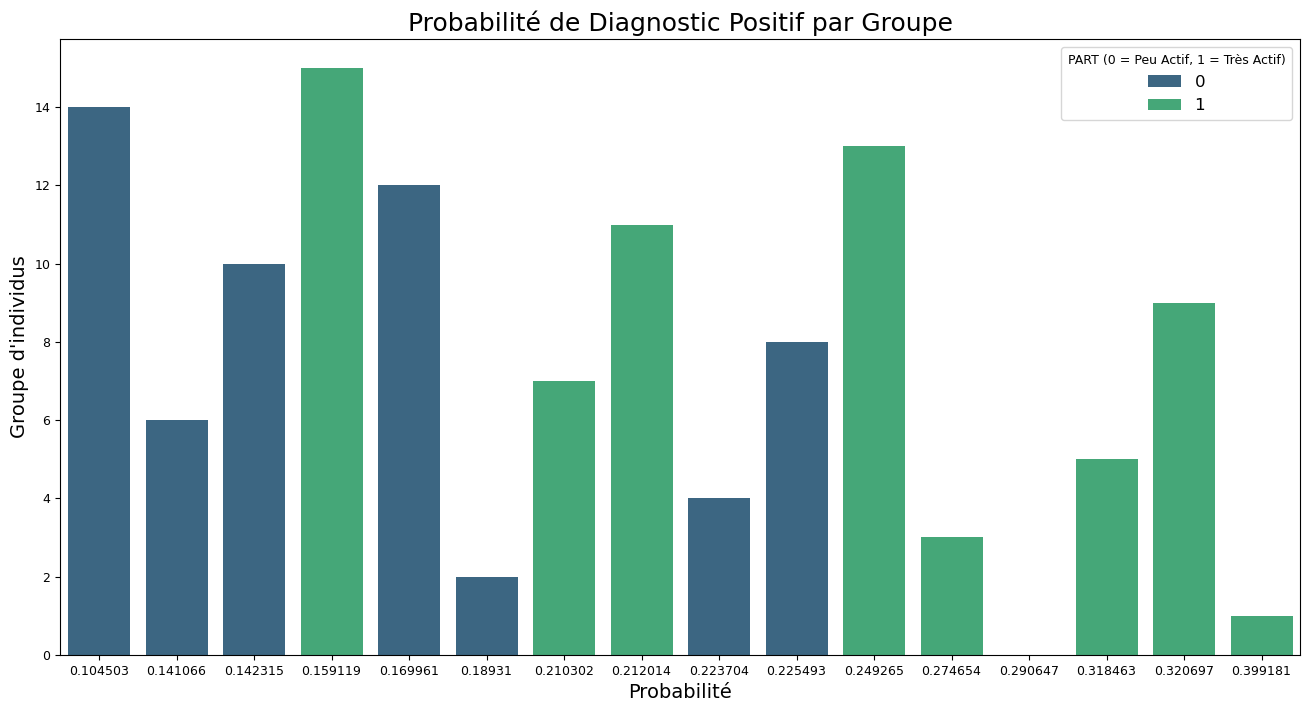

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Les résultats que tu as donnés sous forme de DataFrame
data = {
    'AGE': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    'SEXE': [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2],
    'ORIENT_SEX': [1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2],
    'PART': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'Probability': [0.290647, 0.399181, 0.189310, 0.274654, 0.223704, 0.318463,
                    0.141066, 0.210302, 0.225493, 0.320697, 0.142315, 0.212014,
                    0.169961, 0.249265, 0.104503, 0.159119]
}

results_df = pd.DataFrame(data)

# Créer un graphique de type barplot pour visualiser les probabilités par groupe
plt.figure(figsize=(16, 8))
sns.barplot(
    x='Probability', 
    y=results_df.index, 
    hue='PART', 
    data=results_df, 
    palette='viridis'
)
plt.title('Probabilité de Diagnostic Positif par Groupe', fontsize=18)
plt.xlabel('Probabilité', fontsize=14)
plt.ylabel('Groupe d\'individus', fontsize=14)
plt.legend(title='PART (0 = Peu Actif, 1 = Très Actif)', fontsize=12)
plt.show()
